In [1]:
# Configurações de visualização
%matplotlib inline
%config inlineBackend.figure_formats = ['svg']
# Importação das Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt
from matplotlib import cm
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import lightgbm as ltb
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')
# Configurações de visualização do dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 90)

In [2]:
# Carregamento dos dados em arquivo csv
df = pd.read_csv('german_credit_data.csv', index_col=[0])

In [3]:
# Colunas
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

Renomeação das colunas:

In [4]:
# Renomeação das colunas 
df.columns = ['idade', 'sexo', 'emprego', 'habitacao', 'conta_poupanca', 'conta_corrente', 'credito',
              'duracao', 'proposito', 'risco']

# 1. Análise Exploratória

In [5]:
# Tamanho do Dataset
df.shape

(1000, 10)

In [6]:
# Visualização do DataFrame
df.sample(5)

,idade,sexo,emprego,habitacao,conta_poupanca,conta_corrente,credito,duracao,proposito,risco
802,24,female,2,own,little,little,4272,20,furniture/equipment,good
598,31,male,2,own,little,NaN,2775,18,car,bad
477,25,male,2,own,little,rich,5152,24,radio/TV,good
358,28,male,2,own,little,NaN,776,12,radio/TV,good
880,38,male,3,own,little,NaN,7814,24,car,good


In [7]:
# Colunas do Dataframe
df.columns.values

array(['idade', 'sexo', 'emprego', 'habitacao', 'conta_poupanca',
       'conta_corrente', 'credito', 'duracao', 'proposito', 'risco'],
      dtype=object)

In [8]:
# Tipos de dados do Dataset
df.dtypes

idade              int64
sexo              object
emprego            int64
habitacao         object
conta_poupanca    object
conta_corrente    object
credito            int64
duracao            int64
proposito         object
risco             object
dtype: object

In [9]:
# Frequência dos tipos de dados
df.dtypes.value_counts()

object    6
int64     4
dtype: int64

In [10]:
# Valores únicos em cada coluna
df.nunique()

idade              53
sexo                2
emprego             4
habitacao           3
conta_poupanca      4
conta_corrente      3
credito           921
duracao            33
proposito           8
risco               2
dtype: int64

In [11]:
# Descrição estatística do Dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
idade,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
emprego,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
credito,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
duracao,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


In [12]:
# Descrição estatística das colunas categóricas do Dataset
df.describe(include=['O']).T

,count,unique,top,freq
sexo,1000,2,male,690
habitacao,1000,3,own,713
conta_poupanca,817,4,little,603
conta_corrente,606,3,little,274
proposito,1000,8,car,337
risco,1000,2,good,700


In [13]:
# Campos duplicados
df.duplicated().sum()

0

In [14]:
# Valores nulos no Dataset
df.isnull().sum().sort_values(ascending=False)

conta_corrente    394
conta_poupanca    183
idade               0
sexo                0
emprego             0
habitacao           0
credito             0
duracao             0
proposito           0
risco               0
dtype: int64

In [15]:
# Valores nulos no Dataset em termos de porcentagem
df.isnull().sum()/df.shape[0] * 100

idade              0.0
sexo               0.0
emprego            0.0
habitacao          0.0
conta_poupanca    18.3
conta_corrente    39.4
credito            0.0
duracao            0.0
proposito          0.0
risco              0.0
dtype: float64

In [16]:
# Listando colunas categóricas e numéricas:
v_c = list(df.select_dtypes(include=['object']).columns)
v_n = list(df.select_dtypes(include=['float64', 'int64']).columns)
print('Categorical Variables:', v_c)
print('Numerical Variables:', v_n)

Categorical Variables: ['sexo', 'habitacao', 'conta_poupanca', 'conta_corrente', 'proposito', 'risco']
Numerical Variables: ['idade', 'emprego', 'credito', 'duracao']


In [17]:
# Contagem dos valores das colunas categóricas
colucat = df.select_dtypes(include = 'object').columns
for i in range(0, len(colucat)):
    print(df[colucat[i]].value_counts())
    print('_____________________________\n')

male      690
female    310
Name: sexo, dtype: int64
_____________________________

own     713
rent    179
free    108
Name: habitacao, dtype: int64
_____________________________

little        603
moderate      103
quite rich     63
rich           48
Name: conta_poupanca, dtype: int64
_____________________________

little      274
moderate    269
rich         63
Name: conta_corrente, dtype: int64
_____________________________

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: proposito, dtype: int64
_____________________________

good    700
bad     300
Name: risco, dtype: int64
_____________________________



In [18]:
# Contagem dos valores das colunas categóricas em termos de porcentagem
colucat = df.select_dtypes(include = 'object').columns
for i in range(0, len(colucat)):
    print(df[colucat[i]].value_counts(normalize=True).round(2) * 100)
    print('_____________________________\n')

male      69.0
female    31.0
Name: sexo, dtype: float64
_____________________________

own     71.0
rent    18.0
free    11.0
Name: habitacao, dtype: float64
_____________________________

little        74.0
moderate      13.0
quite rich     8.0
rich           6.0
Name: conta_poupanca, dtype: float64
_____________________________

little      45.0
moderate    44.0
rich        10.0
Name: conta_corrente, dtype: float64
_____________________________

car                    34.0
radio/TV               28.0
furniture/equipment    18.0
business               10.0
education               6.0
repairs                 2.0
domestic appliances     1.0
vacation/others         1.0
Name: proposito, dtype: float64
_____________________________

good    70.0
bad     30.0
Name: risco, dtype: float64
_____________________________



Coluna : Sexo

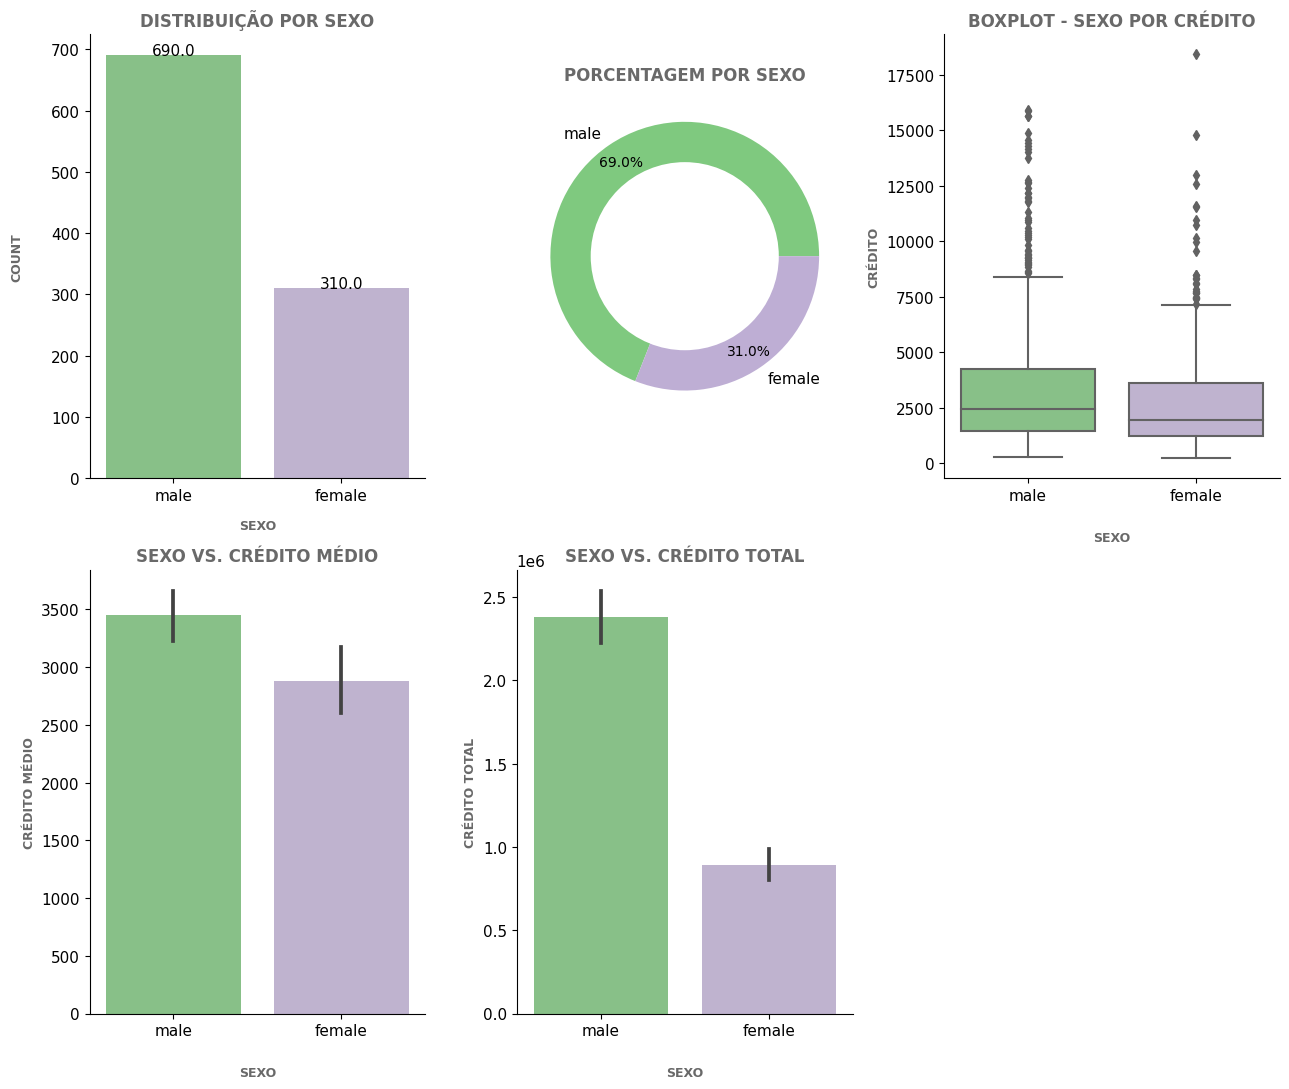

In [19]:
# Plot

plt.figure(figsize=(13,11))

plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11

plt.subplot(2, 3, 1)
cores = ['#7fc97f', '#beaed4']
sns.set_palette(sns.color_palette(cores))
ax = sns.countplot(x='sexo', data=df,order = df['sexo'].value_counts().index)
sns.despine()
plt.title('DISTRIBUIÇÃO POR SEXO', fontsize = 12, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    ax.text (p.get_x() + p.get_width()  / 2, p.get_height()+ 0.75, p.get_height(), horizontalalignment='center', fontsize = 11)
plt.xlabel('SEXO', color = 'dimgrey', labelpad = 12, fontweight = 'bold', fontsize = 9)
plt.ylabel('COUNT', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 9)

plt.subplot(2, 3, 2) 
Legendas = ['male', 'female']
valores = df['sexo'].value_counts()
plt.pie(valores, colors=['#7fc97f', '#beaed4'], labels=Legendas, autopct='%1.1f%%', pctdistance=0.85,)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('PORCENTAGEM POR SEXO', fontsize = 12, color ='dimgrey', fontweight = 'bold')

plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='sexo', y='credito', order = df.groupby(['sexo'])['credito'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - SEXO POR CRÉDITO', fontsize = 12, color ='dimgrey', fontweight = 'bold')
plt.xlabel('SEXO', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 9)
plt.ylabel('CRÉDITO', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(2, 3, 4)
sns.barplot(x = 'sexo', y = 'credito', data=df, order = df.groupby(['sexo'])['credito'].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('SEXO VS. CRÉDITO MÉDIO', fontsize = 12, color ='dimgrey', fontweight = 'bold')
plt.xlabel('SEXO', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 9)
plt.ylabel('CRÉDITO MÉDIO', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(2, 3, 5)
sns.barplot(x = 'sexo', y = 'credito', data=df, estimator=sum, order = df.groupby(['sexo'])['credito'].sum().sort_values(ascending=False).index)
sns.despine()
plt.title('SEXO VS. CRÉDITO TOTAL', fontsize = 12, color ='dimgrey', fontweight = 'bold')
plt.xlabel('SEXO', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 9)
plt.ylabel('CRÉDITO TOTAL', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

fig.tight_layout()
plt.show();

Coluna: Habitação

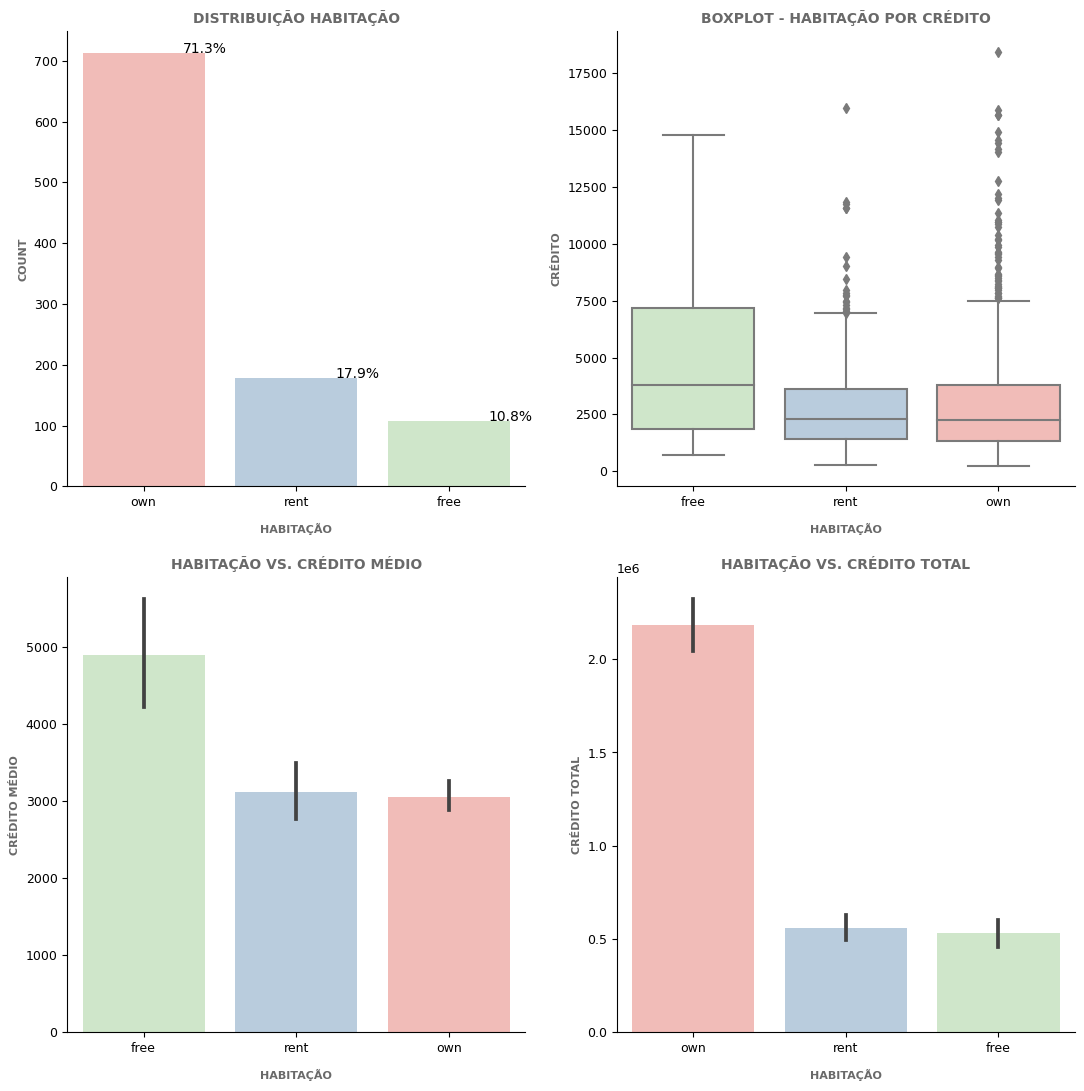

In [20]:
# Plot

plt.figure(figsize=(13,13))

plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9

plt.subplot(2, 2, 1)
total = float(df.shape[0])

ax = sns.countplot(x='habitacao', data=df, palette='Pastel1',  order = df['habitacao'].value_counts().index)
sns.despine()
plt.title('DISTRIBUIÇÃO HABITAÇÃO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('HABITAÇÃO', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 8)
plt.ylabel('COUNT', color = 'dimgrey', fontweight = 'bold', fontsize = 8)

plt.subplot(2, 2, 2)
cores = ['#ccebc5', '#b3cde3', '#fbb4ae']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='habitacao', y='credito', order = df.groupby(['habitacao'])['credito'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - HABITAÇÃO POR CRÉDITO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('HABITAÇÃO', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 8)
plt.ylabel('CRÉDITO', color = 'dimgrey', fontweight = 'bold', fontsize = 8)

plt.subplot(2, 2, 3)
cores = ['#ccebc5', '#b3cde3', '#fbb4ae']
sns.set_palette(sns.color_palette(cores))
sns.barplot(x = 'habitacao', y = 'credito', data=df, order = df.groupby(['habitacao'])['credito'].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('HABITAÇÃO VS. CRÉDITO MÉDIO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('HABITAÇÃO', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 8)
plt.ylabel('CRÉDITO MÉDIO', color = 'dimgrey', fontweight = 'bold', fontsize = 8)

plt.subplot(2, 2, 4)
cores = ['#fbb4ae', '#b3cde3', '#ccebc5']
sns.set_palette(sns.color_palette(cores))
sns.barplot(x = 'habitacao', y = 'credito', data=df, estimator=sum, order = df.groupby(['habitacao'])['credito'].sum().sort_values(ascending=False).index)
sns.despine()
plt.title('HABITAÇÃO VS. CRÉDITO TOTAL', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('HABITAÇÃO', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 8)
plt.ylabel('CRÉDITO TOTAL', color = 'dimgrey', fontweight = 'bold', fontsize = 8)

fig.tight_layout()
plt.show();


Coluna: Conta Poupança

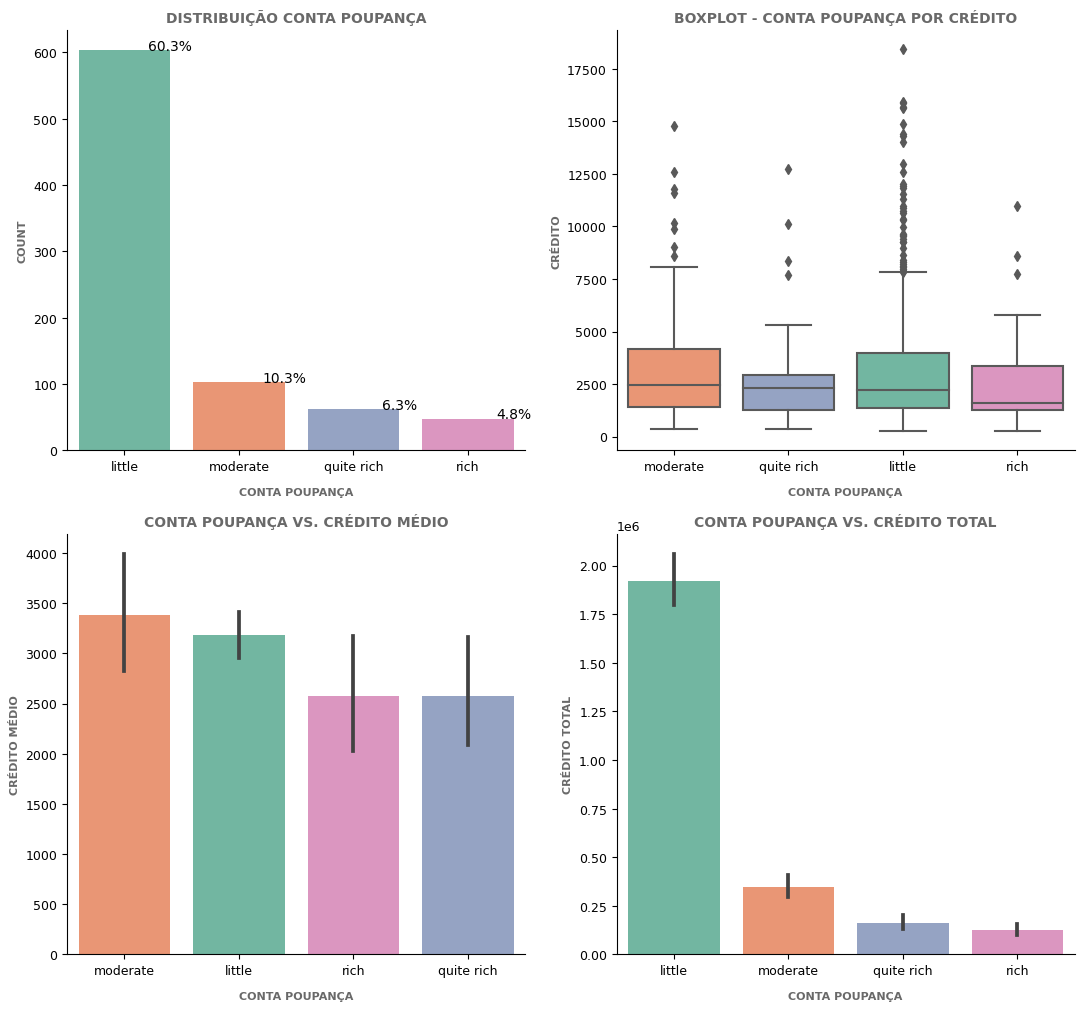

In [21]:
# Plot

plt.figure(figsize=(13,12))

plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9

plt.subplot(2, 2, 1)
total = float(df.shape[0])

ax = sns.countplot(x='conta_poupanca', data=df, palette='Set2', order = df['conta_poupanca'].value_counts().index)
sns.despine()
plt.title('DISTRIBUIÇÃO CONTA POUPANÇA', fontsize = 10, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('CONTA POUPANÇA', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 8)
plt.ylabel('COUNT', color = 'dimgrey', fontweight = 'bold', fontsize = 8)

plt.subplot(2, 2, 2)
cores = ['#fc8d62', '#8da0cb', '#66c2a5', '#e78ac3']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='conta_poupanca', y='credito', order = df.groupby(['conta_poupanca'])['credito'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CONTA POUPANÇA POR CRÉDITO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CONTA POUPANÇA', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 8)
plt.ylabel('CRÉDITO', color = 'dimgrey', fontweight = 'bold', fontsize = 8)

plt.subplot(2, 2, 3)
cores = ['#fc8d62', '#66c2a5', '#e78ac3', '#8da0cb']
sns.set_palette(sns.color_palette(cores))
sns.barplot(x = 'conta_poupanca', y = 'credito', data=df, order = df.groupby(['conta_poupanca'])['credito'].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('CONTA POUPANÇA VS. CRÉDITO MÉDIO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CONTA POUPANÇA', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 8)
plt.ylabel('CRÉDITO MÉDIO', color = 'dimgrey', fontweight = 'bold', fontsize = 8)

plt.subplot(2, 2, 4)
cores = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
sns.set_palette(sns.color_palette(cores))
sns.barplot(x = 'conta_poupanca', y = 'credito', data=df, estimator=sum, order = df.groupby(['conta_poupanca'])['credito'].sum().sort_values(ascending=False).index)
sns.despine()
plt.title('CONTA POUPANÇA VS. CRÉDITO TOTAL', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CONTA POUPANÇA', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 8)
plt.ylabel('CRÉDITO TOTAL', color = 'dimgrey', fontweight = 'bold', fontsize = 8)

fig.tight_layout()
plt.show();

Coluna: Conta Corrente

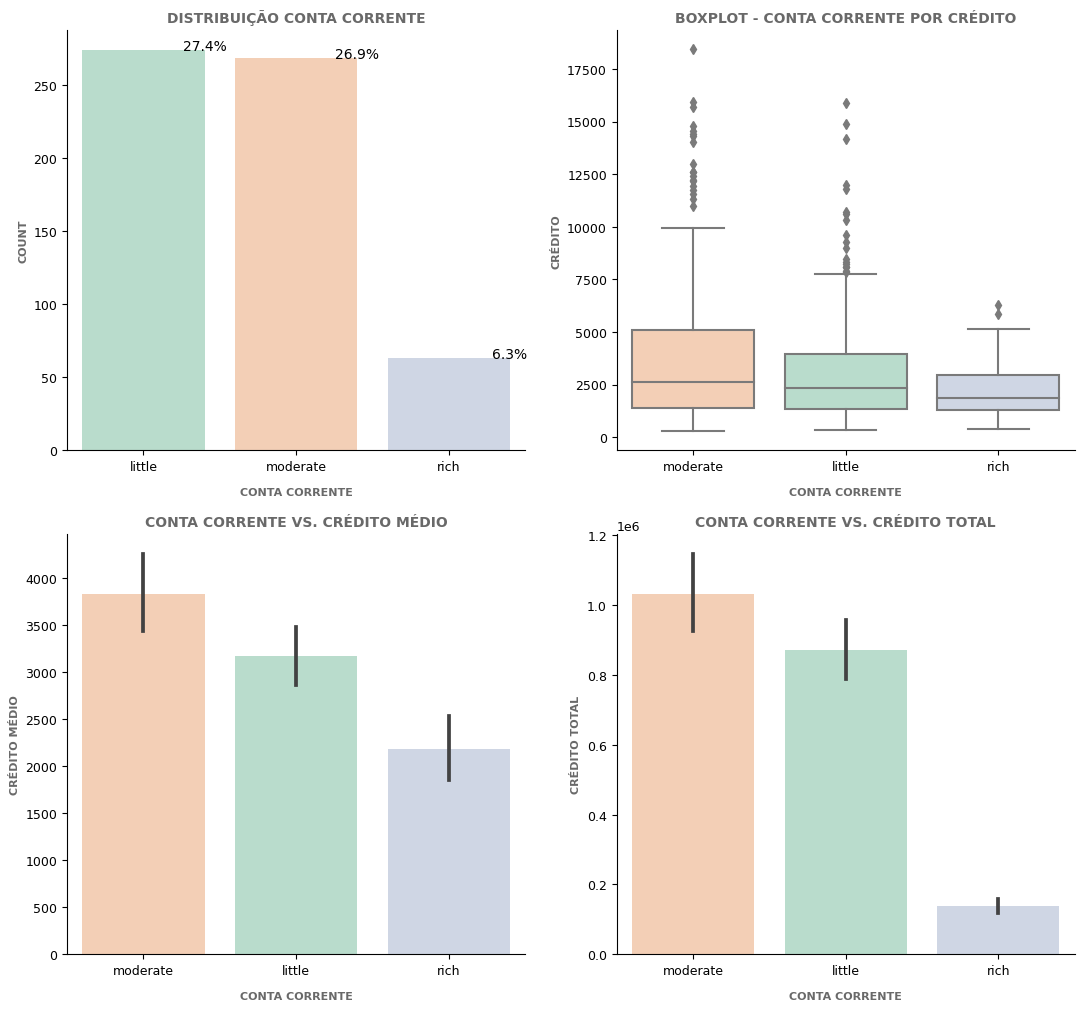

In [22]:
# Plot

plt.figure(figsize=(13,12))

plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9

plt.subplot(2, 2, 1)
total = float(df.shape[0])

ax = sns.countplot(x='conta_corrente', data=df, palette='Pastel2', order = df['conta_corrente'].value_counts().index)
sns.despine()
plt.title('DISTRIBUIÇÃO CONTA CORRENTE', fontsize = 10, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('CONTA CORRENTE', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 8)
plt.ylabel('COUNT', color = 'dimgrey', fontweight = 'bold', fontsize = 8)

plt.subplot(2, 2, 2)
cores = ['#fdcdac', '#b3e2cd', '#cbd5e8']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='conta_corrente', y='credito', order = df.groupby(['conta_corrente'])['credito'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CONTA CORRENTE POR CRÉDITO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CONTA CORRENTE', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 8)
plt.ylabel('CRÉDITO', color = 'dimgrey', fontweight = 'bold', fontsize = 8)

plt.subplot(2, 2, 3)
cores = ['#fdcdac', '#b3e2cd', '#cbd5e8']
sns.set_palette(sns.color_palette(cores))
sns.barplot(x = 'conta_corrente', y = 'credito', data=df, order = df.groupby(['conta_corrente'])['credito'].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('CONTA CORRENTE VS. CRÉDITO MÉDIO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CONTA CORRENTE', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 8)
plt.ylabel('CRÉDITO MÉDIO', color = 'dimgrey', fontweight = 'bold', fontsize = 8)

plt.subplot(2, 2, 4)
cores = ['#fdcdac', '#b3e2cd', '#cbd5e8']
sns.set_palette(sns.color_palette(cores))
sns.barplot(x = 'conta_corrente', y = 'credito', data=df, estimator=sum, order = df.groupby(['conta_corrente'])['credito'].sum().sort_values(ascending=False).index)
sns.despine()
plt.title('CONTA CORRENTE VS. CRÉDITO TOTAL', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CONTA CORRENTE', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 8)
plt.ylabel('CRÉDITO TOTAL', color = 'dimgrey', fontweight = 'bold', fontsize = 8)

fig.tight_layout()
plt.show();

Coluna: Propósito

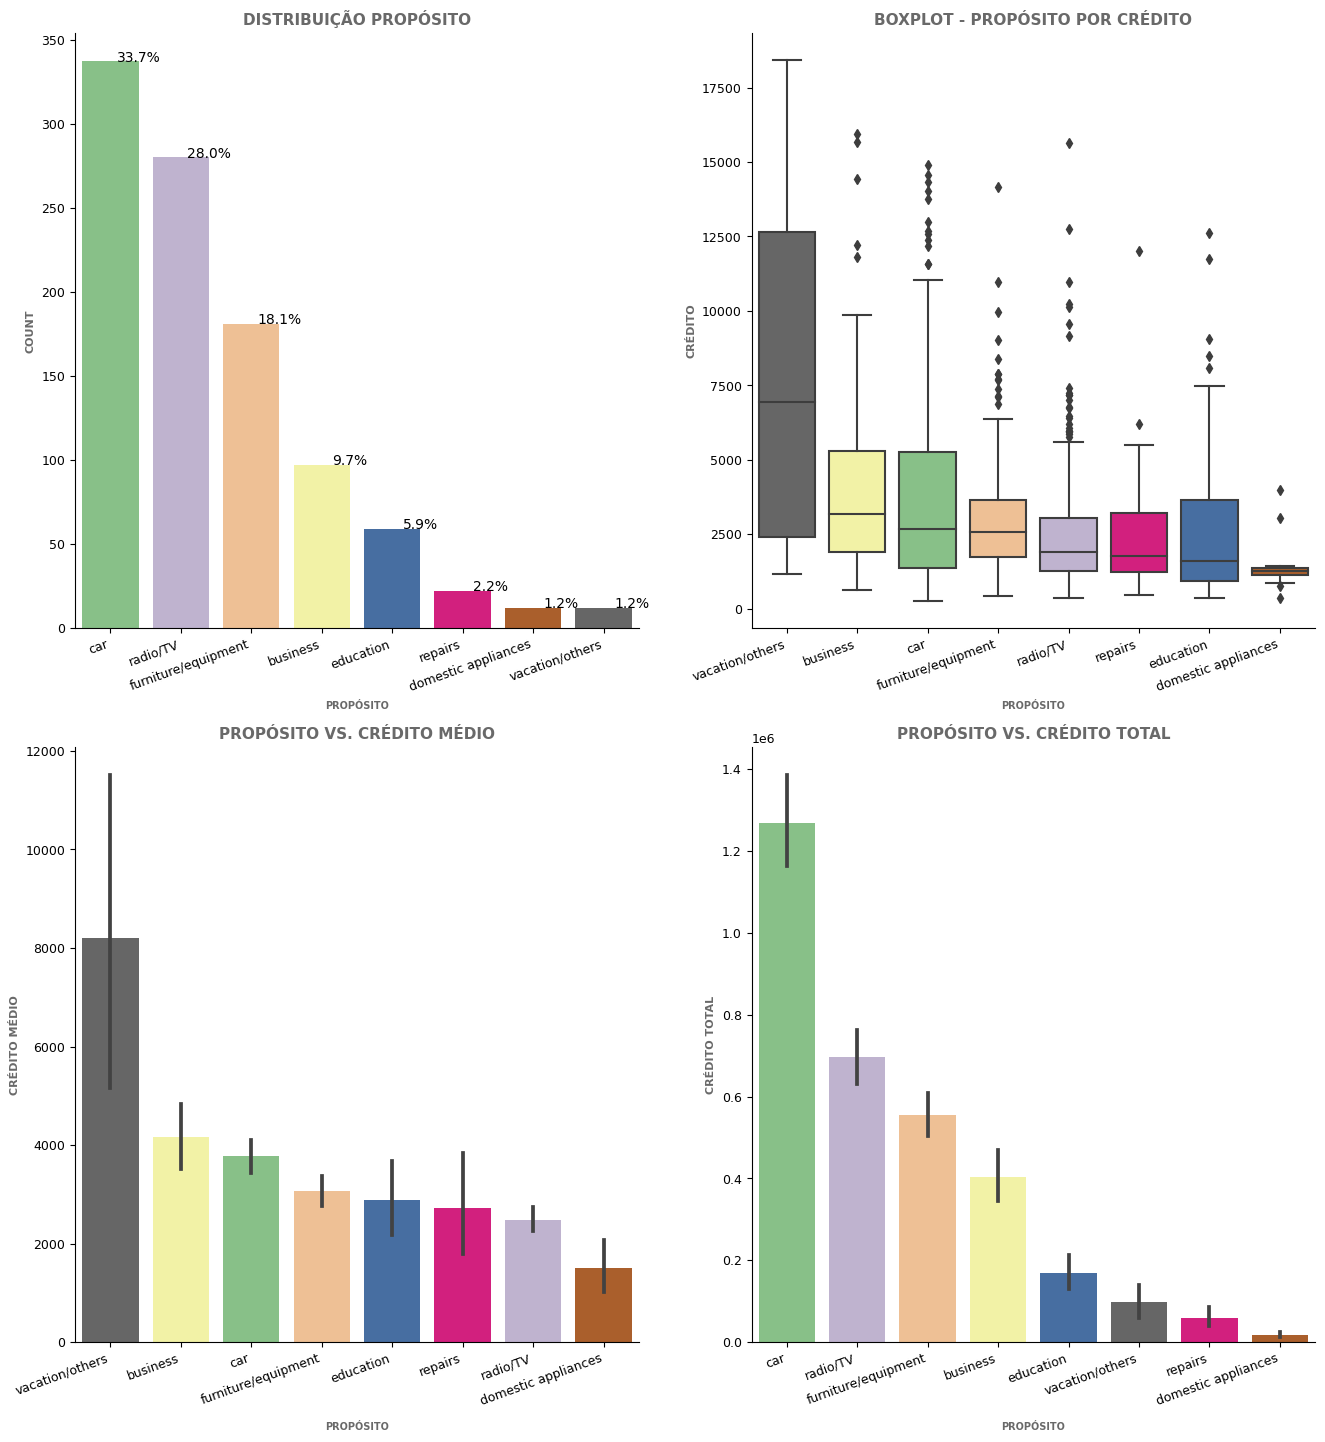

In [23]:
# Plot

plt.figure(figsize=(16,17))

plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9

plt.subplot(2, 2, 1)
total = float(df.shape[0])

ax = sns.countplot(x='proposito', data=df, palette='Accent', order = df['proposito'].value_counts().index)
sns.despine()
plt.title('DISTRIBUIÇÃO PROPÓSITO', fontsize = 11, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('PROPÓSITO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('COUNT', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.xticks(rotation=20, ha='right')

plt.subplot(2, 2, 2)
cores = ['#666666', '#ffff99', '#7fc97f', '#fdc086', '#beaed4', '#f0027f', '#386cb0', '#bf5b17']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='proposito', y='credito', order = df.groupby(['proposito'])['credito'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - PROPÓSITO POR CRÉDITO', fontsize = 11, color ='dimgrey', fontweight = 'bold')
plt.xlabel('PROPÓSITO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('CRÉDITO', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.xticks(rotation=20, ha='right')

plt.subplot(2, 2, 3)
cores = ['#666666', '#ffff99', '#7fc97f', '#fdc086', '#386cb0', '#f0027f', '#beaed4', '#bf5b17']
sns.set_palette(sns.color_palette(cores))
sns.barplot(x = 'proposito', y = 'credito', data=df, order = df.groupby(['proposito'])['credito'].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('PROPÓSITO VS. CRÉDITO MÉDIO', fontsize = 11, color ='dimgrey', fontweight = 'bold')
plt.xlabel('PROPÓSITO', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 7)
plt.ylabel('CRÉDITO MÉDIO', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.xticks(rotation=20, ha='right')

plt.subplot(2, 2, 4)
cores = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#666666', '#f0027f', '#bf5b17']
sns.set_palette(sns.color_palette(cores))
sns.barplot(x = 'proposito', y = 'credito', data=df, estimator=sum, order = df.groupby(['proposito'])['credito'].sum().sort_values(ascending=False).index)
sns.despine()
plt.title('PROPÓSITO VS. CRÉDITO TOTAL', fontsize = 11, color ='dimgrey', fontweight = 'bold')
plt.xlabel('PROPÓSITO', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 7)
plt.ylabel('CRÉDITO TOTAL', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.xticks(rotation=20, ha='right')

fig.tight_layout()
plt.show();

Coluna: Risco

In [24]:
# Distribuição do Risco
df['risco'].value_counts()

good    700
bad     300
Name: risco, dtype: int64

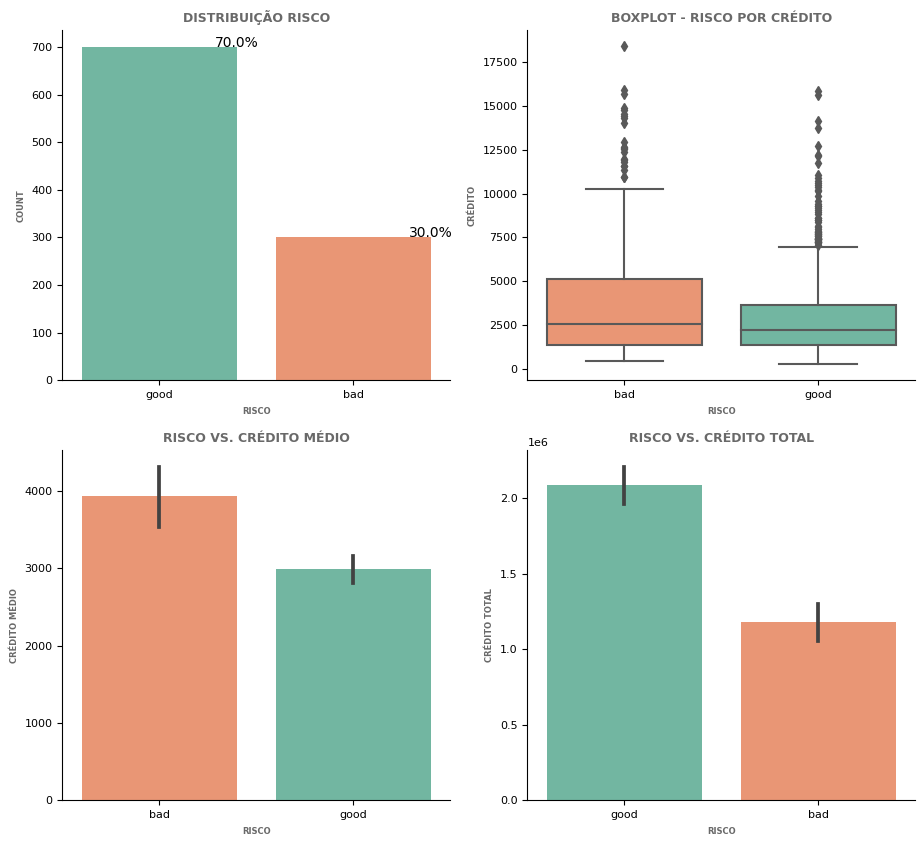

In [25]:
# Plot

plt.figure(figsize=(11,10))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(2, 2, 1)
total = float(df.shape[0])

ax = sns.countplot(x='risco', data=df, palette = 'Set2', order = df['risco'].value_counts().index)
sns.despine()
plt.title('DISTRIBUIÇÃO RISCO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('RISCO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 6)
plt.ylabel('COUNT', color = 'dimgrey', fontweight = 'bold', fontsize = 6)

plt.subplot(2, 2, 2)
cores = ['#fc8d62', '#66c2a5']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='risco', y='credito', order = df.groupby(['risco'])['credito'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - RISCO POR CRÉDITO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('RISCO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 6)
plt.ylabel('CRÉDITO', color = 'dimgrey', fontweight = 'bold', fontsize = 6)

plt.subplot(2, 2, 3)
sns.barplot(x = 'risco', y = 'credito', data=df, order = df.groupby(['risco'])['credito'].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('RISCO VS. CRÉDITO MÉDIO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('RISCO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 6)
plt.ylabel('CRÉDITO MÉDIO', color = 'dimgrey', fontweight = 'bold', fontsize = 6)

plt.subplot(2, 2, 4)
sns.barplot(x = 'risco', y = 'credito', data=df, palette = 'Set2', estimator=sum, order = df.groupby(['risco'])['credito'].sum().sort_values(ascending=False).index)
sns.despine()
plt.title('RISCO VS. CRÉDITO TOTAL', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('RISCO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 6)
plt.ylabel('CRÉDITO TOTAL', color = 'dimgrey', fontweight = 'bold', fontsize = 6)

fig.tight_layout()
plt.show();

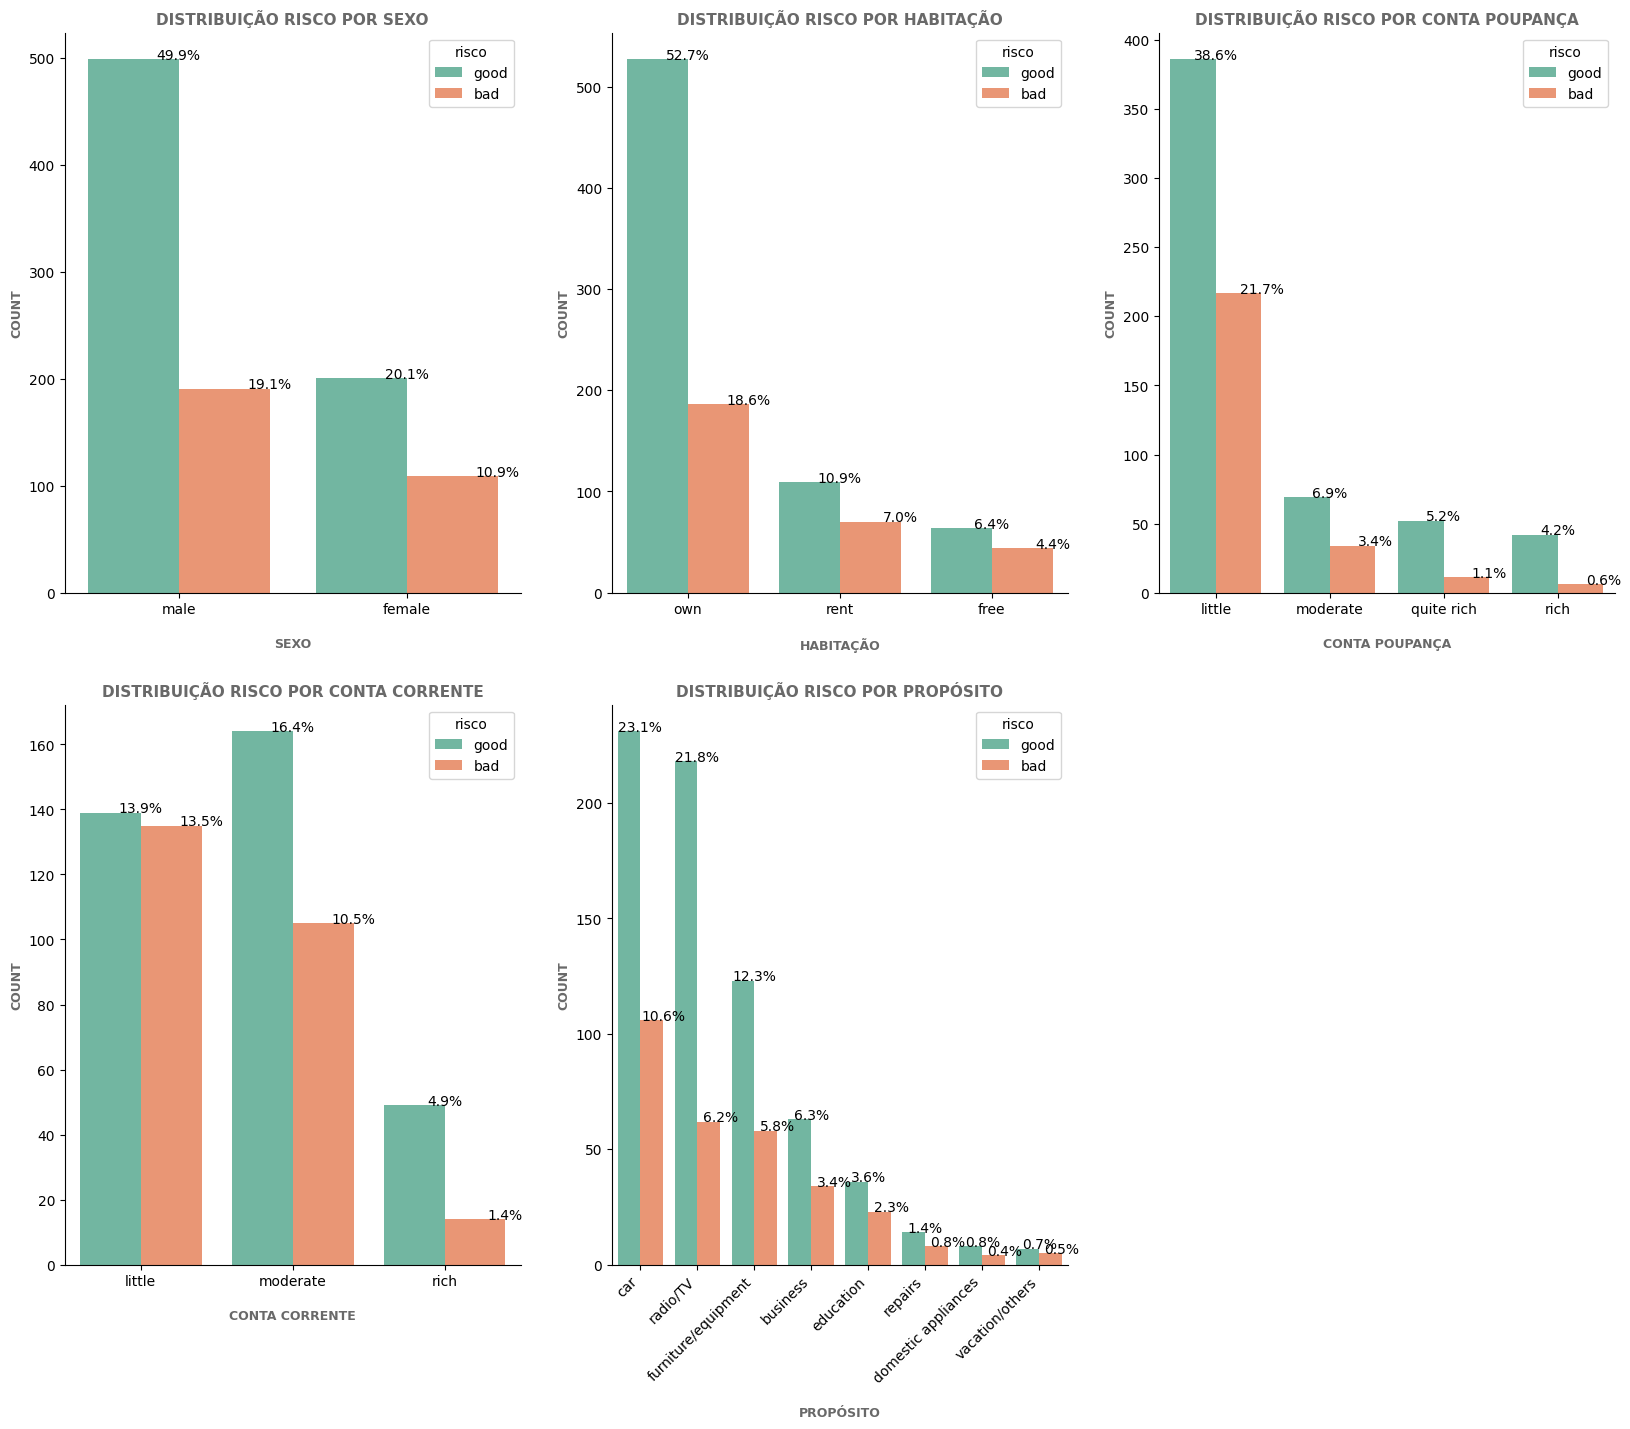

In [26]:
# Plot

plt.figure(figsize=(20,16))

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.subplot(2, 3, 1)
total = float(df.shape[0])
ax = sns.countplot(x='sexo', data=df, hue='risco', palette = 'Set2', order = df['sexo'].value_counts().index)
sns.despine()
plt.title('DISTRIBUIÇÃO RISCO POR SEXO', fontsize = 11, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('SEXO', color = 'dimgrey', labelpad = 15, fontweight = 'bold', fontsize = 9)
plt.ylabel('COUNT', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(2, 3, 2)
total = float(df.shape[0])
ax = sns.countplot(x='habitacao', data=df, hue='risco', palette = 'Set2', order = df['habitacao'].value_counts().index)
sns.despine()
plt.title('DISTRIBUIÇÃO RISCO POR HABITAÇÃO', fontsize = 11, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('HABITAÇÃO', color = 'dimgrey', labelpad = 15, fontweight = 'bold', fontsize = 9)
plt.ylabel('COUNT', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(2, 3, 3)
total = float(df.shape[0])
ax = sns.countplot(x='conta_poupanca', data=df, hue='risco', palette = 'Set2', order = df['conta_poupanca'].value_counts().index)
sns.despine()
plt.title('DISTRIBUIÇÃO RISCO POR CONTA POUPANÇA', fontsize = 11, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('CONTA POUPANÇA', color = 'dimgrey', labelpad = 15, fontweight = 'bold', fontsize = 9)
plt.ylabel('COUNT', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(2, 3, 4)
total = float(df.shape[0])
ax = sns.countplot(x='conta_corrente', data=df, hue='risco', palette = 'Set2', order = df['conta_corrente'].value_counts().index)
sns.despine()
plt.title('DISTRIBUIÇÃO RISCO POR CONTA CORRENTE', fontsize = 11, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('CONTA CORRENTE', color = 'dimgrey', labelpad = 15, fontweight = 'bold', fontsize = 9)
plt.ylabel('COUNT', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(2, 3, 5)
total = float(df.shape[0])
ax = sns.countplot(x='proposito', data=df, hue='risco', palette = 'Set2', order = df['proposito'].value_counts().index)
sns.despine()
plt.title('DISTRIBUIÇÃO RISCO POR PROPÓSITO', fontsize = 11, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('PROPÓSITO', color = 'dimgrey', labelpad = 15, fontweight = 'bold', fontsize = 9)
plt.ylabel('COUNT', color = 'dimgrey', fontweight = 'bold', fontsize = 9)
plt.xticks(rotation=45, ha='right')

fig.tight_layout()
plt.show();

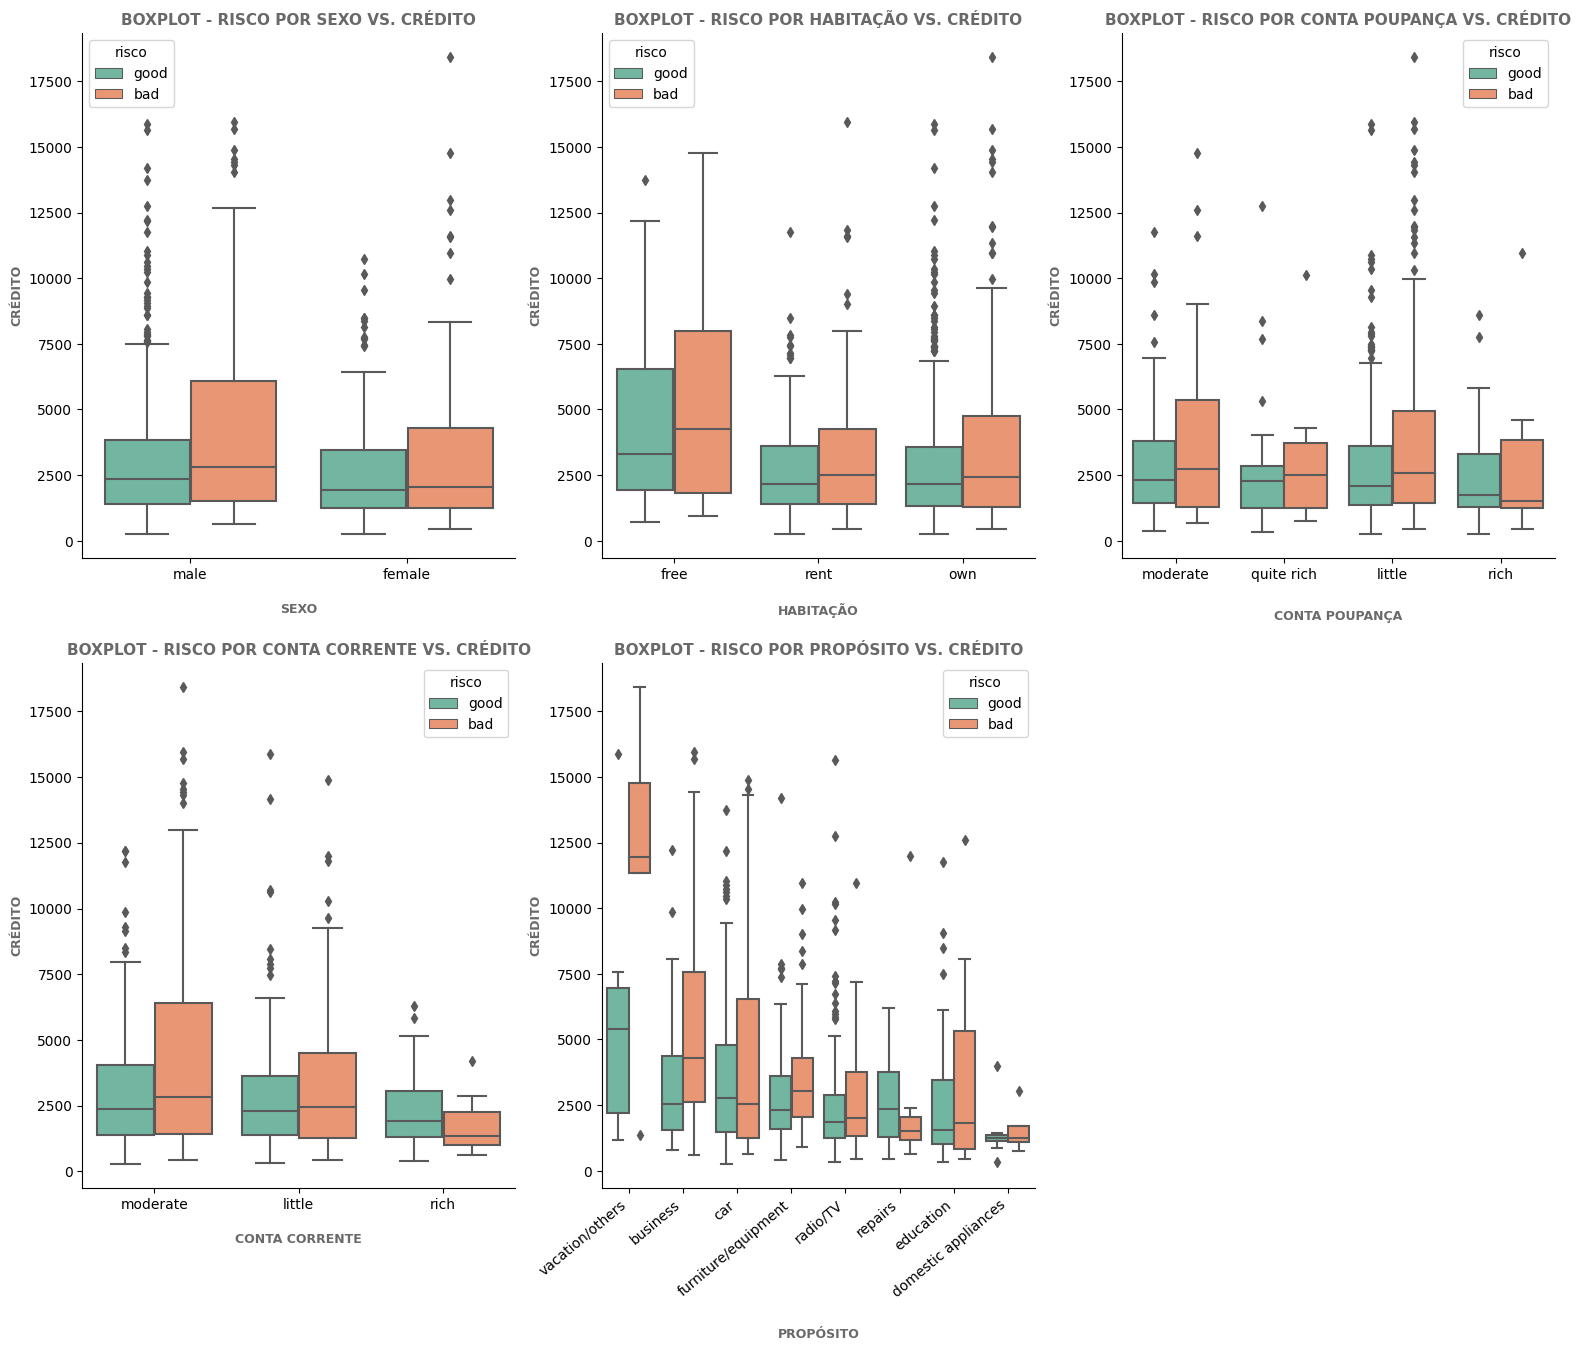

In [27]:
# Plot

plt.figure(figsize=(19,15))

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='sexo', y='credito', palette = 'Set2', hue='risco', order = df.groupby(["sexo"])["credito"].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - RISCO POR SEXO VS. CRÉDITO', fontsize = 11, color ='dimgrey', fontweight = 'bold')
plt.xlabel('SEXO', color = 'dimgrey', labelpad = 15, fontweight = 'bold', fontsize = 9)
plt.ylabel('CRÉDITO', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='habitacao', y='credito', palette = 'Set2', hue='risco', order = df.groupby(["habitacao"])["credito"].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - RISCO POR HABITAÇÃO VS. CRÉDITO', fontsize = 11, color ='dimgrey', fontweight = 'bold')
plt.xlabel('HABITAÇÃO', color = 'dimgrey', labelpad = 15, fontweight = 'bold', fontsize = 9)
plt.ylabel('CRÉDITO', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='conta_poupanca', y='credito', palette = 'Set2', hue='risco', order = df.groupby(["conta_poupanca"])["credito"].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - RISCO POR CONTA POUPANÇA VS. CRÉDITO', fontsize = 11, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CONTA POUPANÇA', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 9)
plt.ylabel('CRÉDITO', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='conta_corrente', y='credito', palette = 'Set2', hue='risco', order = df.groupby(["conta_corrente"])["credito"].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - RISCO POR CONTA CORRENTE VS. CRÉDITO', fontsize = 11, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CONTA CORRENTE', color = 'dimgrey', labelpad = 15, fontweight = 'bold', fontsize = 9)
plt.ylabel('CRÉDITO', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='proposito', y='credito', palette = 'Set2', hue='risco', order = df.groupby(["proposito"])["credito"].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - RISCO POR PROPÓSITO VS. CRÉDITO', fontsize = 11, color ='dimgrey', fontweight = 'bold')
plt.xlabel('PROPÓSITO', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 9)
plt.ylabel('CRÉDITO', color = 'dimgrey', fontweight = 'bold', fontsize = 9)
plt.xticks(rotation=40, ha='right')

fig.tight_layout()
plt.show();

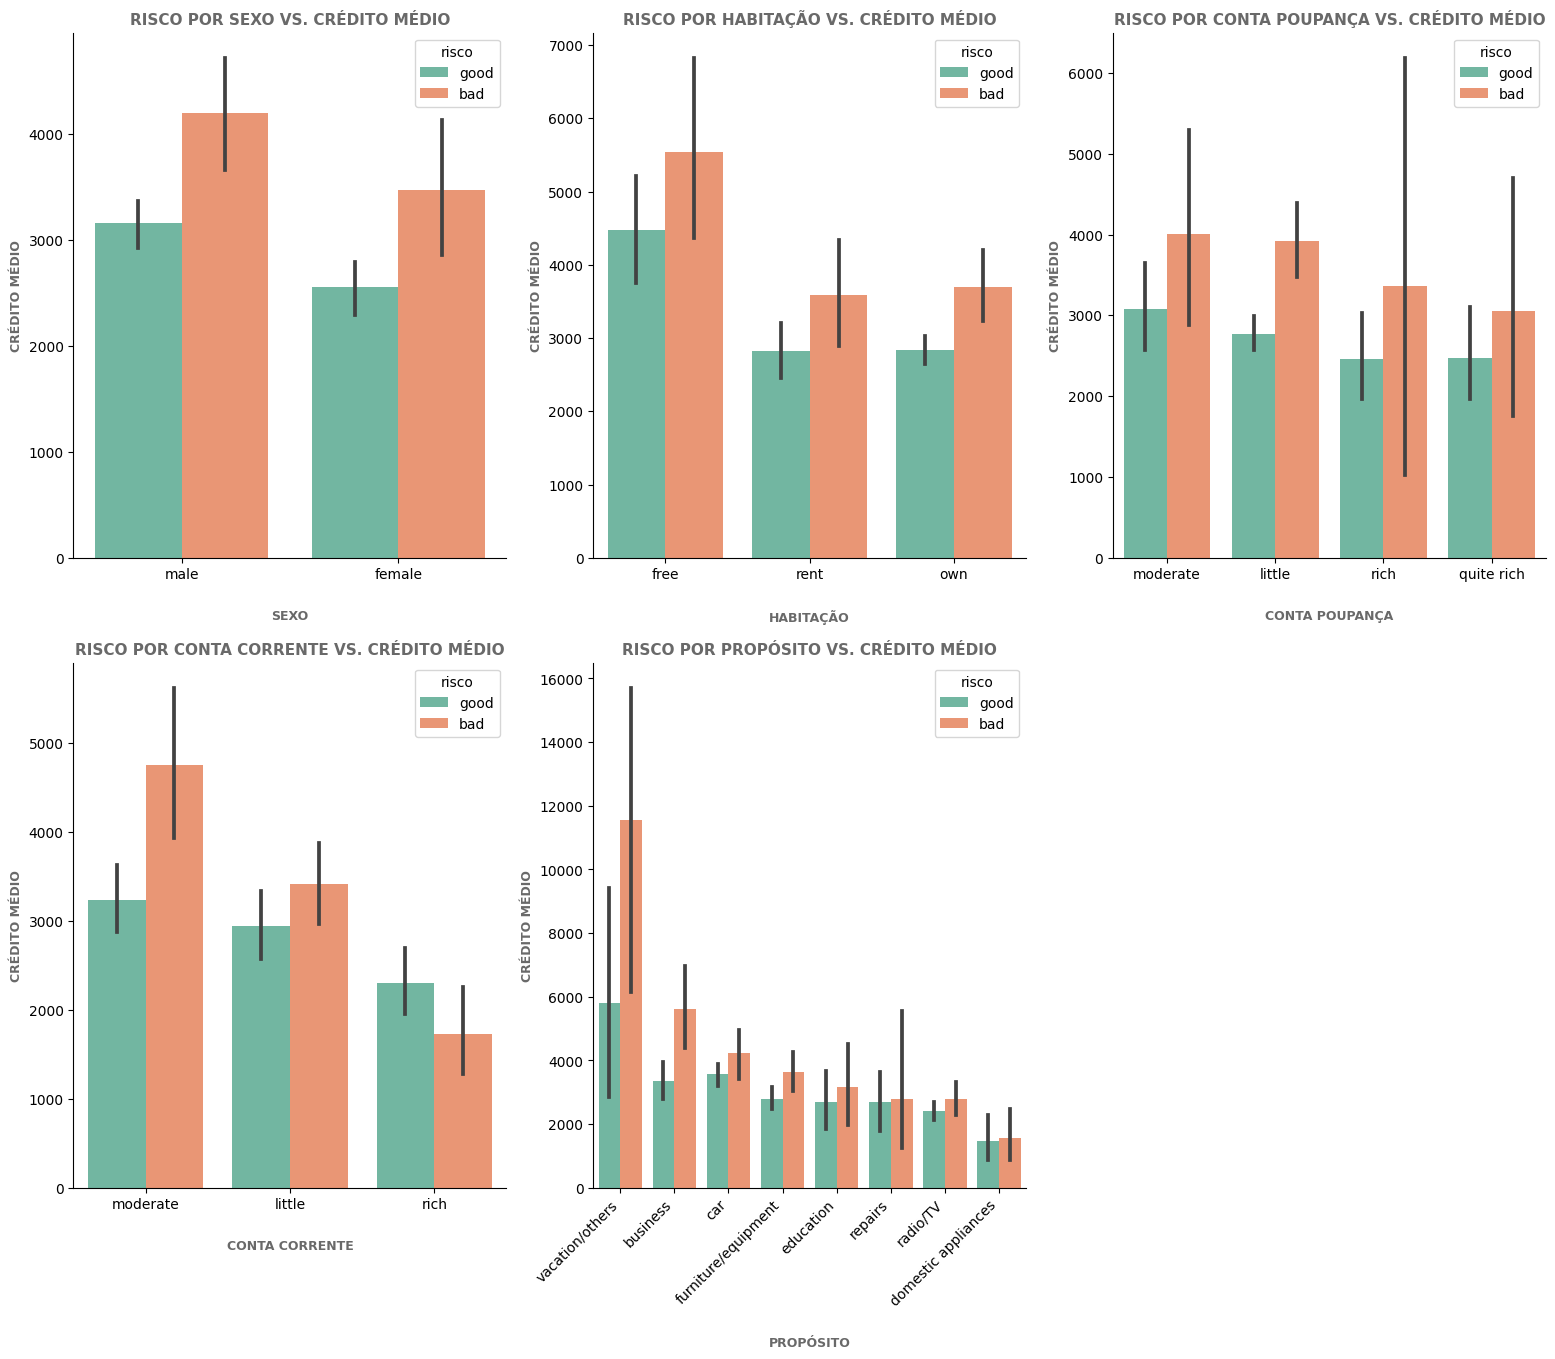

In [28]:
# Plot

plt.figure(figsize=(19,15))

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.subplot(2, 3, 1)
sns.barplot(x = 'sexo', y = 'credito', palette = 'Set2', hue='risco', data=df, order = df.groupby(['sexo'])['credito'].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('RISCO POR SEXO VS. CRÉDITO MÉDIO', fontsize = 11, color ='dimgrey', fontweight = 'bold')
plt.xlabel('SEXO', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 9)
plt.ylabel('CRÉDITO MÉDIO', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(2, 3, 2)
sns.barplot(x = 'habitacao', y = 'credito', palette = 'Set2', hue='risco', data=df, order = df.groupby(['habitacao'])['credito'].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('RISCO POR HABITAÇÃO VS. CRÉDITO MÉDIO', fontsize = 11, color ='dimgrey', fontweight = 'bold')
plt.xlabel('HABITAÇÃO', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 9)
plt.ylabel('CRÉDITO MÉDIO', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(2, 3, 3)
sns.barplot(x = 'conta_poupanca', y = 'credito', palette = 'Set2', hue='risco', data=df, order = df.groupby(['conta_poupanca'])['credito'].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('RISCO POR CONTA POUPANÇA VS. CRÉDITO MÉDIO', fontsize = 11, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CONTA POUPANÇA', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 9)
plt.ylabel('CRÉDITO MÉDIO', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(2, 3, 4)
sns.barplot(x = 'conta_corrente', y = 'credito', palette = 'Set2', hue='risco', data=df, order = df.groupby(['conta_corrente'])['credito'].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('RISCO POR CONTA CORRENTE VS. CRÉDITO MÉDIO', fontsize = 11, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CONTA CORRENTE', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 9)
plt.ylabel('CRÉDITO MÉDIO', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(2, 3, 5)
sns.barplot(x = 'proposito', y = 'credito', palette = 'Set2', hue='risco', data=df, order = df.groupby(['proposito'])['credito'].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('RISCO POR PROPÓSITO VS. CRÉDITO MÉDIO', fontsize = 11, color ='dimgrey', fontweight = 'bold')
plt.xlabel('PROPÓSITO', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 9)
plt.ylabel('CRÉDITO MÉDIO', color = 'dimgrey', fontweight = 'bold', fontsize = 9)
plt.xticks(rotation=45, ha='right')

fig.tight_layout()
plt.show();

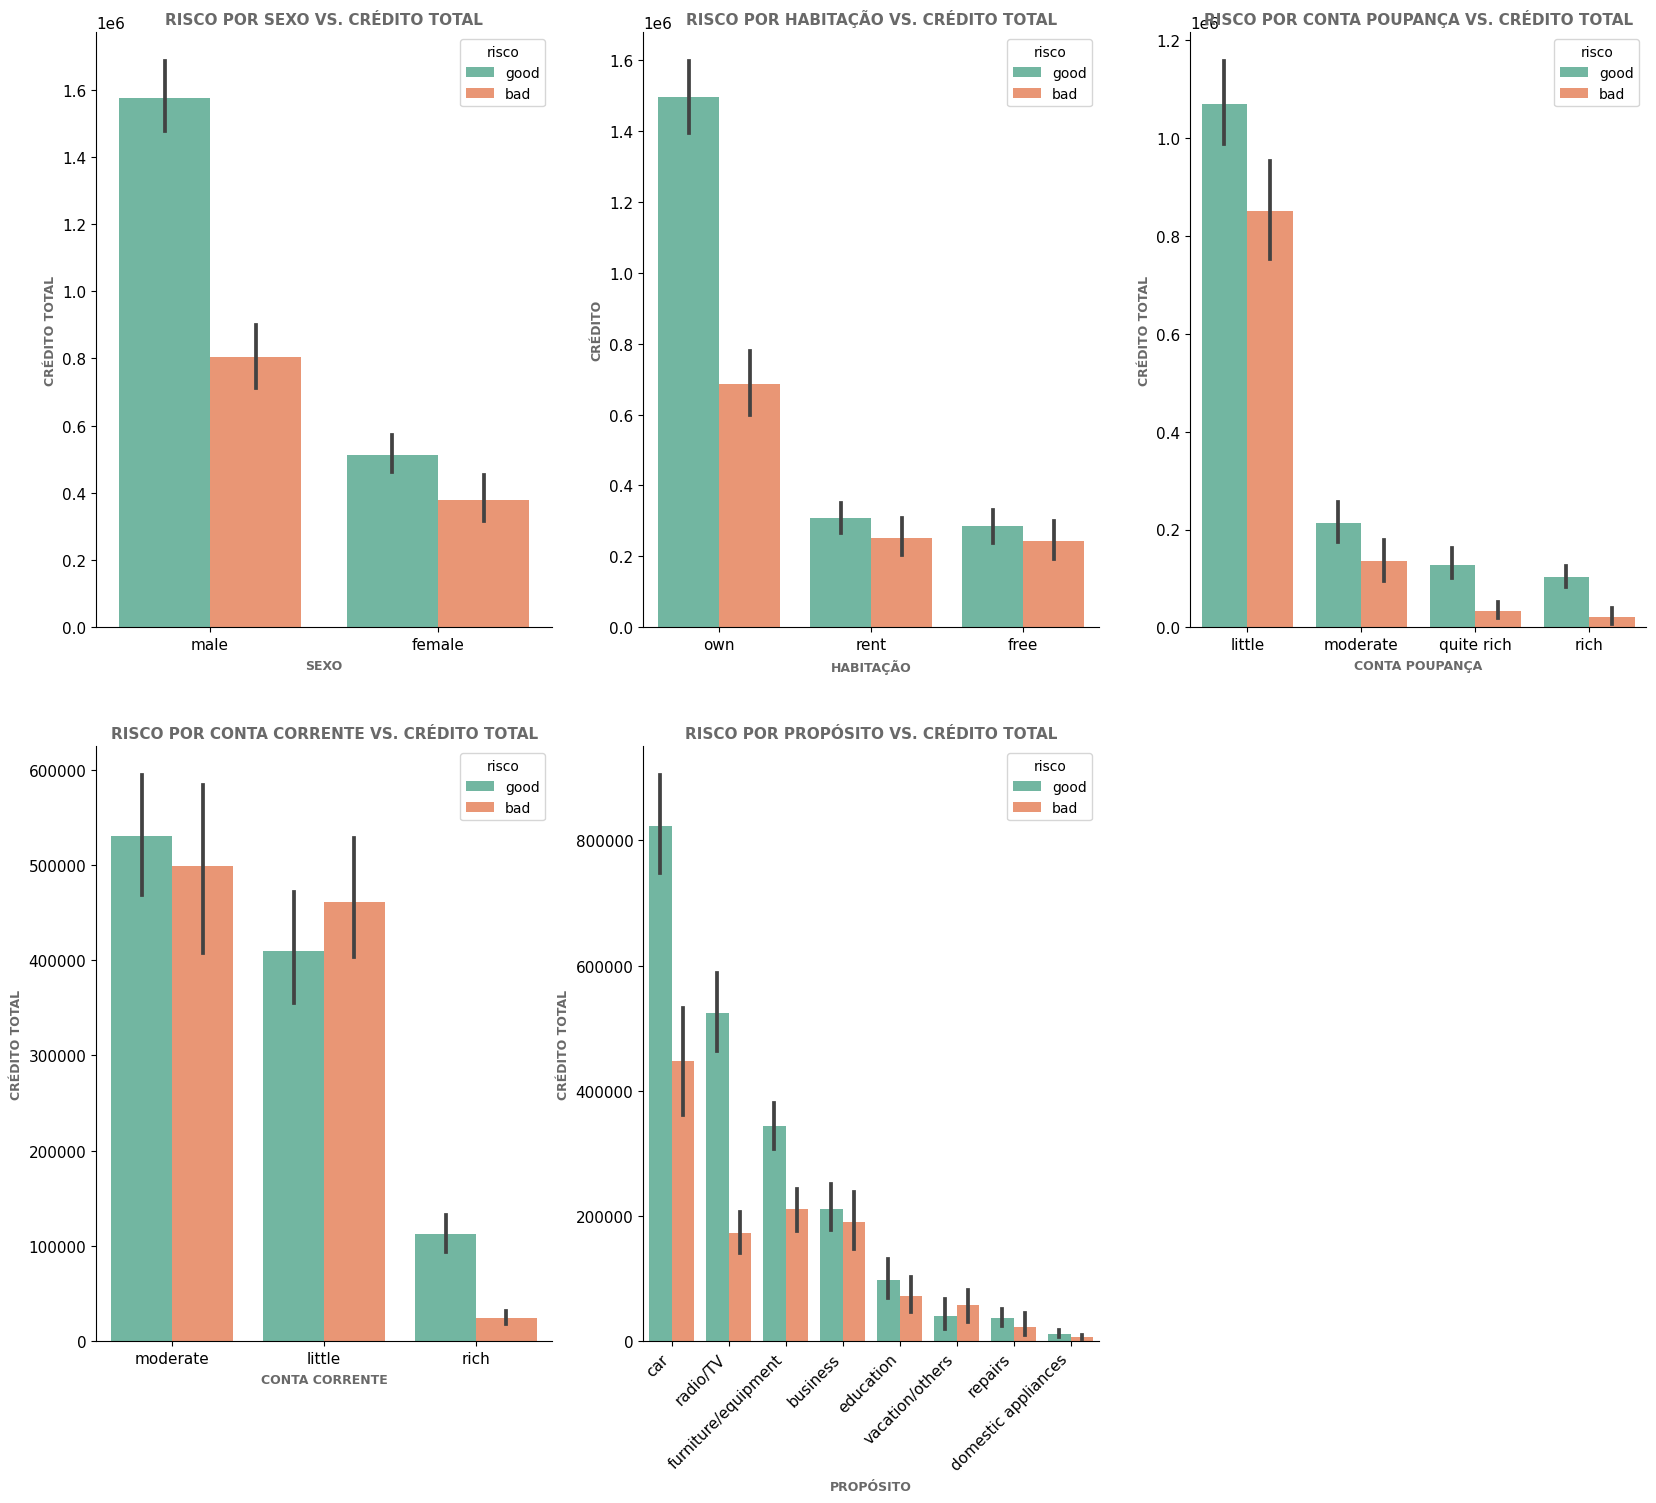

In [29]:
# Plot

plt.figure(figsize=(20,17))

plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11

plt.subplot(2, 3, 1)
sns.barplot(x = 'sexo', y = 'credito', palette = 'Set2', hue='risco', data=df, estimator=sum, order = df.groupby(['sexo'])['credito'].sum().sort_values(ascending=False).index)
sns.despine()
plt.title('RISCO POR SEXO VS. CRÉDITO TOTAL', fontsize = 11, color ='dimgrey', fontweight = 'bold')
plt.xlabel('SEXO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 9)
plt.ylabel('CRÉDITO TOTAL', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(2, 3, 2)
sns.barplot(x = 'habitacao', y = 'credito', palette = 'Set2', hue='risco', data=df, estimator=sum, order = df.groupby(['habitacao'])['credito'].sum().sort_values(ascending=False).index)
sns.despine()
plt.title('RISCO POR HABITAÇÃO VS. CRÉDITO TOTAL', fontsize = 11, color ='dimgrey', fontweight = 'bold')
plt.xlabel('HABITAÇÃO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 9)
plt.ylabel('CRÉDITO', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(2, 3, 3)
sns.barplot(x = 'conta_poupanca', y = 'credito', palette = 'Set2', hue='risco', data=df, estimator=sum, order = df.groupby(['conta_poupanca'])['credito'].sum().sort_values(ascending=False).index)
sns.despine()
plt.title('RISCO POR CONTA POUPANÇA VS. CRÉDITO TOTAL', fontsize = 11, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CONTA POUPANÇA', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 9)
plt.ylabel('CRÉDITO TOTAL', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(2, 3, 4)
sns.barplot(x = 'conta_corrente', y = 'credito', palette = 'Set2', hue='risco', data=df, estimator=sum, order = df.groupby(['conta_corrente'])['credito'].sum().sort_values(ascending=False).index)
sns.despine()
plt.title('RISCO POR CONTA CORRENTE VS. CRÉDITO TOTAL', fontsize = 11, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CONTA CORRENTE', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 9)
plt.ylabel('CRÉDITO TOTAL', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(2, 3, 5)
sns.barplot(x = 'proposito', y = 'credito', palette = 'Set2', hue='risco', data=df, estimator=sum, order = df.groupby(['proposito'])['credito'].sum().sort_values(ascending=False).index)
sns.despine()
plt.title('RISCO POR PROPÓSITO VS. CRÉDITO TOTAL', fontsize = 11, color ='dimgrey', fontweight = 'bold')
plt.xlabel('PROPÓSITO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 9)
plt.ylabel('CRÉDITO TOTAL', color = 'dimgrey', fontweight = 'bold', fontsize = 9)
plt.xticks(rotation=45, ha='right')

fig.tight_layout()
plt.show();

Coluna: Idade

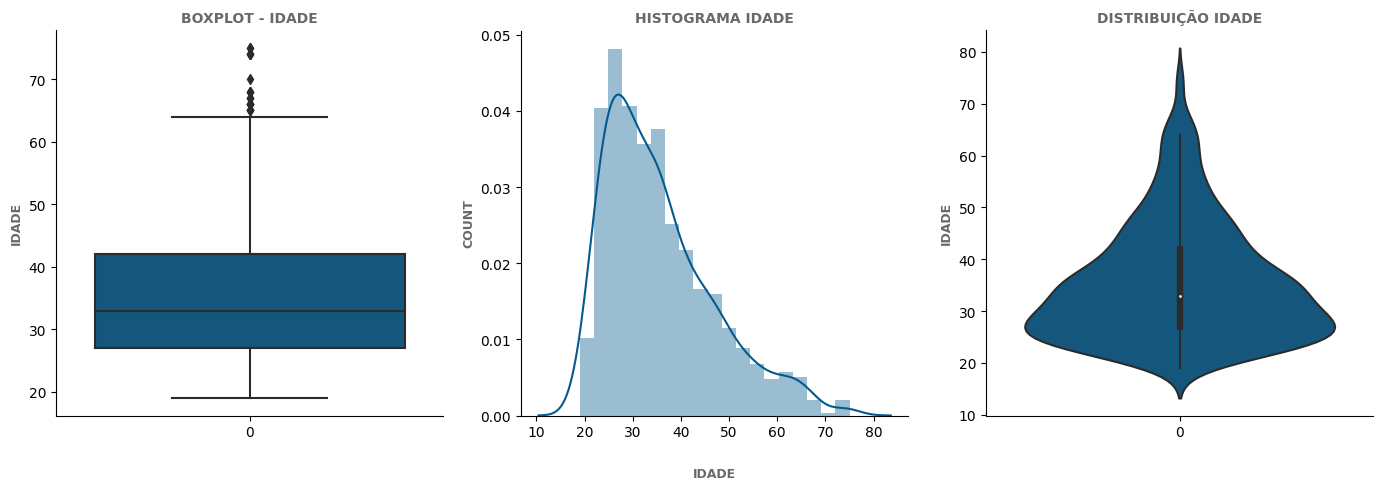

In [30]:
# Plot

plt.figure(figsize=(17,5))

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.subplot(1, 3, 1)
sns.boxplot(df['idade'], color='#045a8d')
sns.despine()
plt.title('BOXPLOT - IDADE', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.ylabel('IDADE', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(1, 3, 2)
sns.distplot(df['idade'], color='#045a8d')
sns.despine()
plt.title('HISTOGRAMA IDADE', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('IDADE', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 9)
plt.ylabel('COUNT', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(1, 3, 3)
sns.violinplot(df['idade'], color='#045a8d')
sns.despine()
plt.title('DISTRIBUIÇÃO IDADE', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.ylabel('IDADE', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

fig.tight_layout()
plt.show();

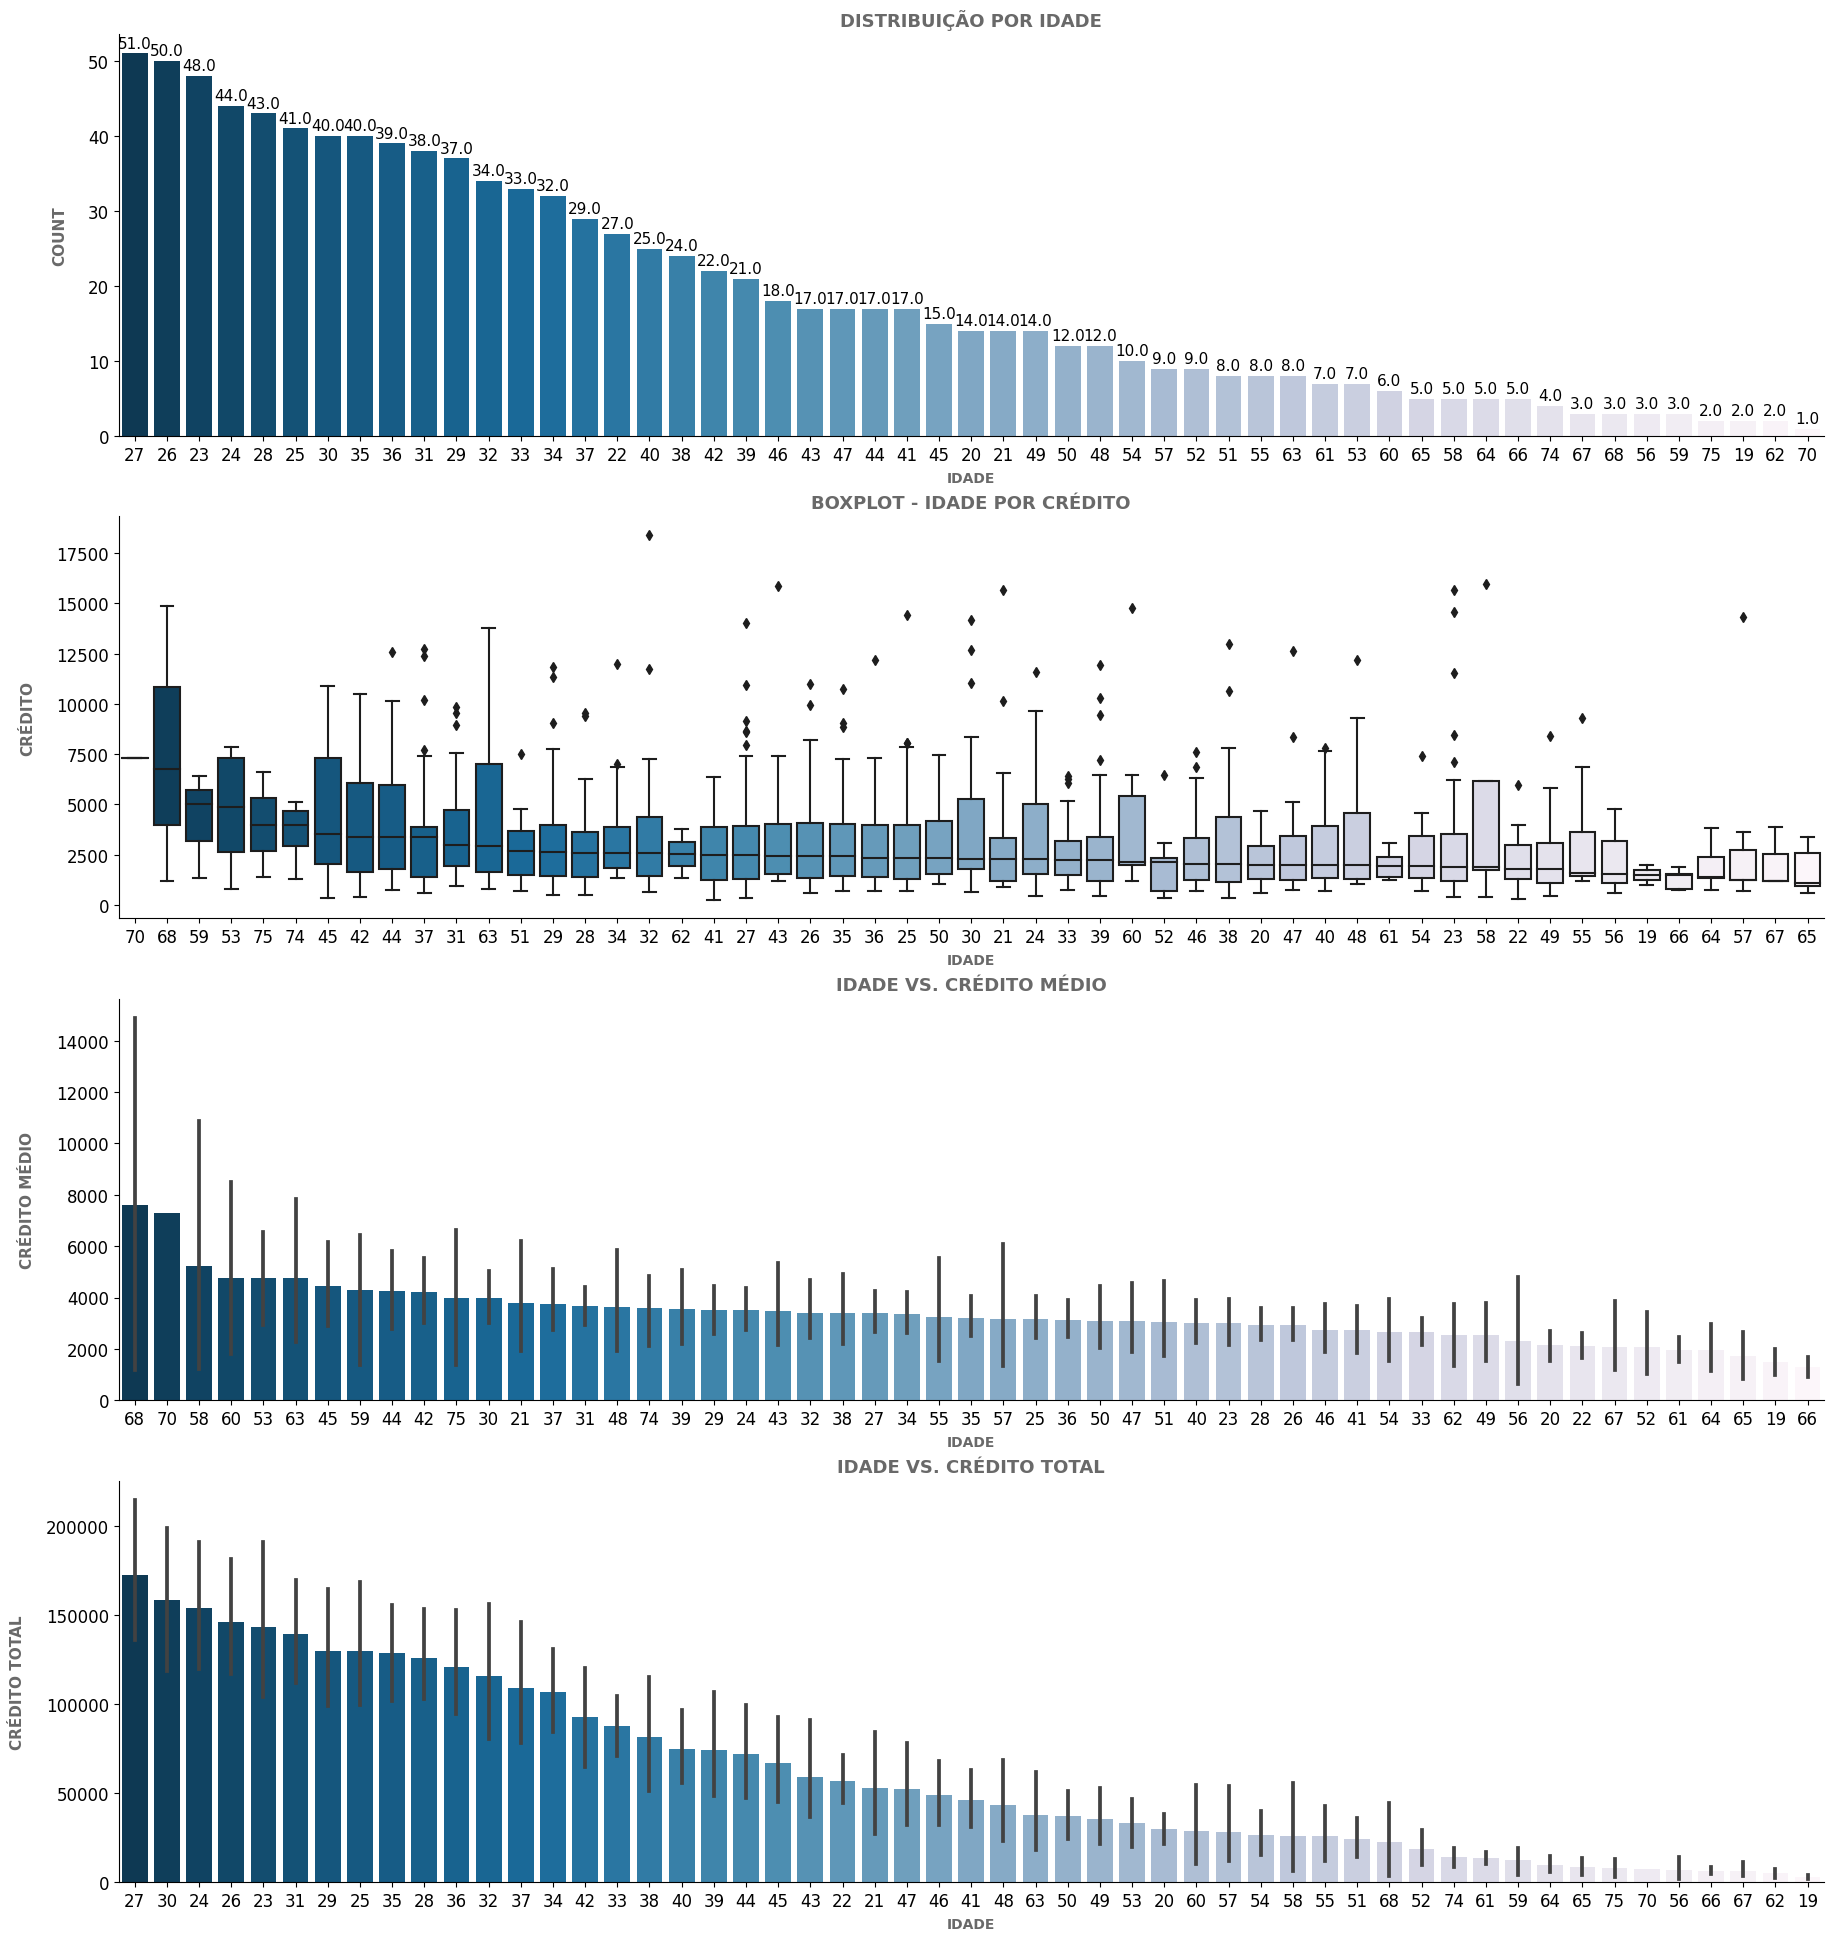

In [31]:
# Plot

plt.figure(figsize=(22,24))

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.subplot(4, 1, 1)
ax = sns.countplot(x='idade', palette = 'PuBu_r', data=df,order = df['idade'].value_counts().index)
sns.despine()
plt.title('DISTRIBUIÇÃO POR IDADE', fontsize = 13, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    ax.text (p.get_x() + p.get_width()  / 2, p.get_height()+ 0.75, p.get_height(), horizontalalignment='center', fontsize = 11)
plt.xlabel('IDADE', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 10)
plt.ylabel('COUNT', color = 'dimgrey', labelpad = 15, fontweight = 'bold', fontsize = 11)

plt.subplot(4, 1, 2)
sns.boxplot(data=df, x='idade', y='credito', palette = 'PuBu_r', order = df.groupby(['idade'])['credito'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - IDADE POR CRÉDITO', fontsize = 13, color ='dimgrey', fontweight = 'bold')
plt.xlabel('IDADE', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 10)
plt.ylabel('CRÉDITO', color = 'dimgrey', labelpad = 15, fontweight = 'bold', fontsize = 11)

plt.subplot(4, 1, 3)
sns.barplot(x = 'idade', y = 'credito', data=df, palette = 'PuBu_r', order = df.groupby(['idade'])['credito'].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('IDADE VS. CRÉDITO MÉDIO', fontsize = 13, color ='dimgrey', fontweight = 'bold')
plt.xlabel('IDADE', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 10)
plt.ylabel('CRÉDITO MÉDIO', color = 'dimgrey', labelpad = 15, fontweight = 'bold', fontsize = 11)

plt.subplot(4, 1, 4)
sns.barplot(x = 'idade', y = 'credito', data=df, palette = 'PuBu_r', estimator=sum, order = df.groupby(['idade'])['credito'].sum().sort_values(ascending=False).index)
sns.despine()
plt.title('IDADE VS. CRÉDITO TOTAL', fontsize = 13, color ='dimgrey', fontweight = 'bold')
plt.xlabel('IDADE', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 10)
plt.ylabel('CRÉDITO TOTAL', color = 'dimgrey', labelpad = 15, fontweight = 'bold', fontsize = 11)

fig.tight_layout()
plt.show();

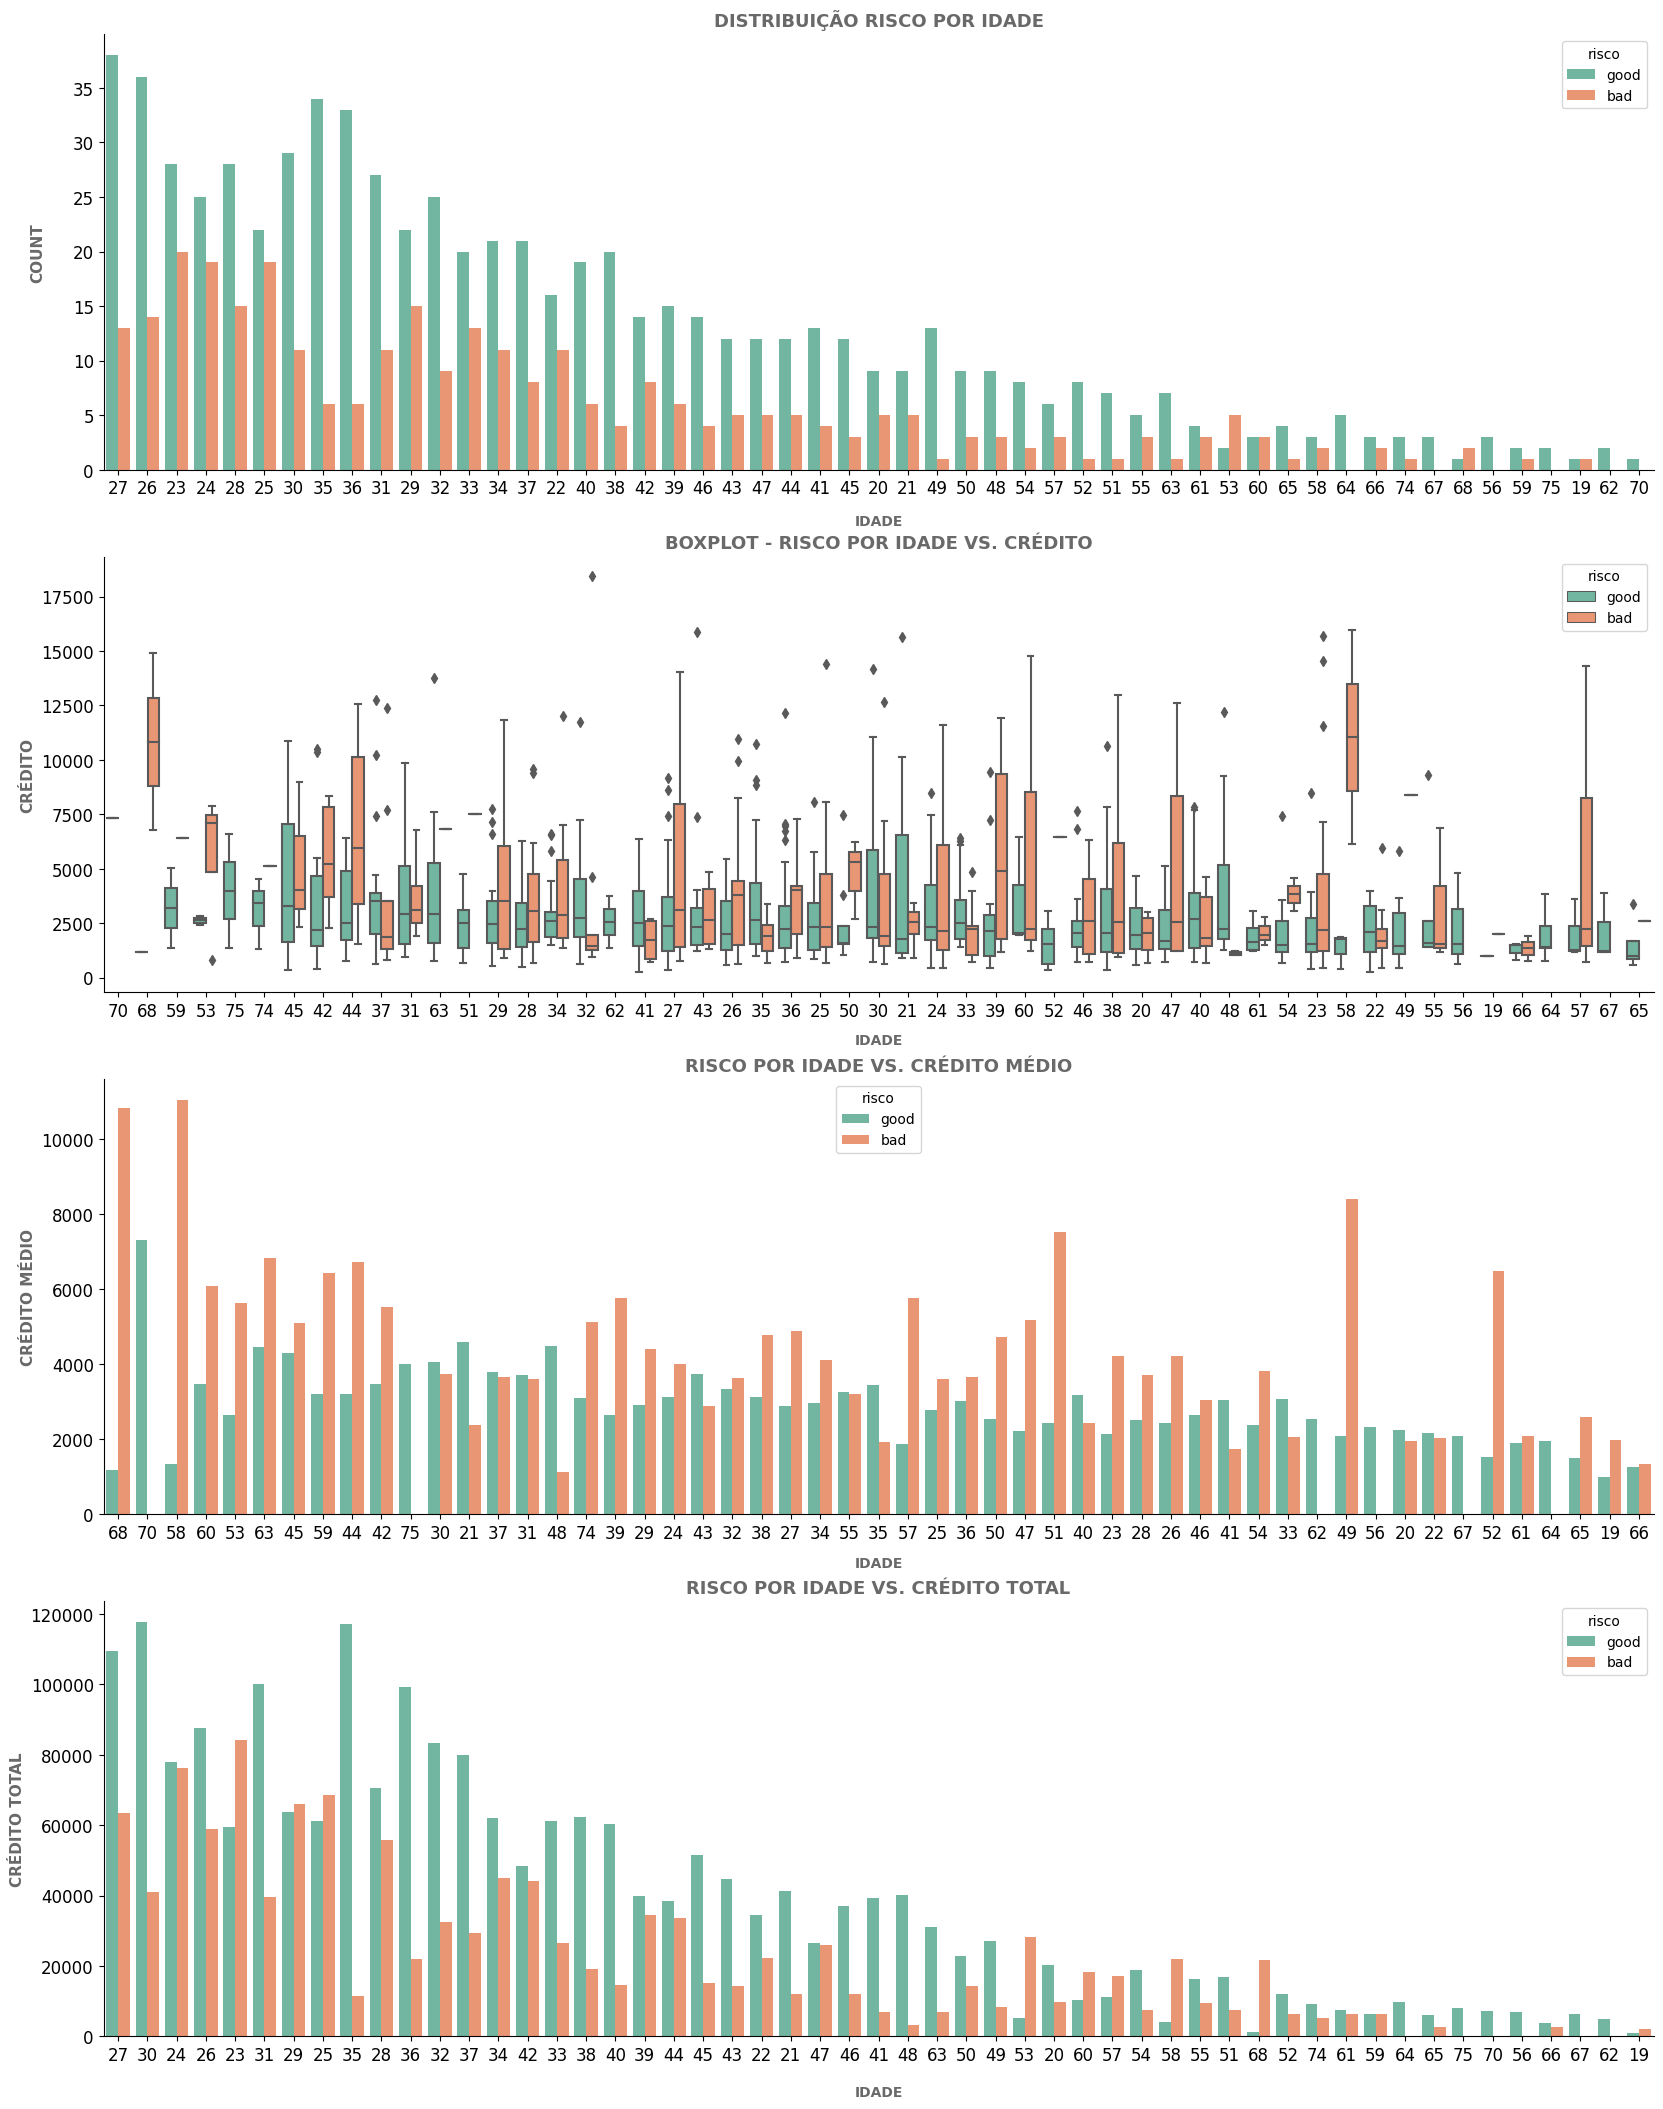

In [32]:
# Plot

plt.figure(figsize=(20,26))

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.subplot(4, 1, 1)
sns.countplot(x='idade', hue='risco', data=df, palette = 'Set2', order = df['idade'].value_counts().index)
plt.title('DISTRIBUIÇÃO RISCO POR IDADE', fontsize = 13, color ='dimgrey', fontweight = 'bold')
plt.xlabel('IDADE', color = 'dimgrey', labelpad = 12, fontweight = 'bold', fontsize = 10)
plt.ylabel('COUNT', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 11)

plt.subplot(4, 1, 2)
sns.boxplot(data=df, x='idade', y='credito', palette = 'Set2', hue='risco', order = df.groupby(["idade"])["credito"].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - RISCO POR IDADE VS. CRÉDITO', fontsize = 13, color ='dimgrey', fontweight = 'bold')
plt.xlabel('IDADE', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 10)
plt.ylabel('CRÉDITO', color = 'dimgrey', fontweight = 'bold', fontsize = 11)

plt.subplot(4, 1, 3)
sns.barplot(x = 'idade', y = 'credito', palette = 'Set2', hue='risco', data=df, ci=None, order = df.groupby(['idade'])['credito'].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('RISCO POR IDADE VS. CRÉDITO MÉDIO', fontsize = 13, color ='dimgrey', fontweight = 'bold')
plt.xlabel('IDADE', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 10)
plt.ylabel('CRÉDITO MÉDIO', color = 'dimgrey', fontweight = 'bold', fontsize = 11)

plt.subplot(4, 1, 4)
sns.barplot(x = 'idade', y = 'credito', palette = 'Set2', hue='risco', data=df, ci=None, estimator=sum, order = df.groupby(['idade'])['credito'].sum().sort_values(ascending=False).index)
sns.despine()
plt.title('RISCO POR IDADE VS. CRÉDITO TOTAL', fontsize = 13, color ='dimgrey', fontweight = 'bold')
plt.xlabel('IDADE', color = 'dimgrey', labelpad = 15, fontweight = 'bold', fontsize = 10)
plt.ylabel('CRÉDITO TOTAL', color = 'dimgrey', fontweight = 'bold', fontsize = 11)

fig.tight_layout()
plt.show();

Coluna: Emprego

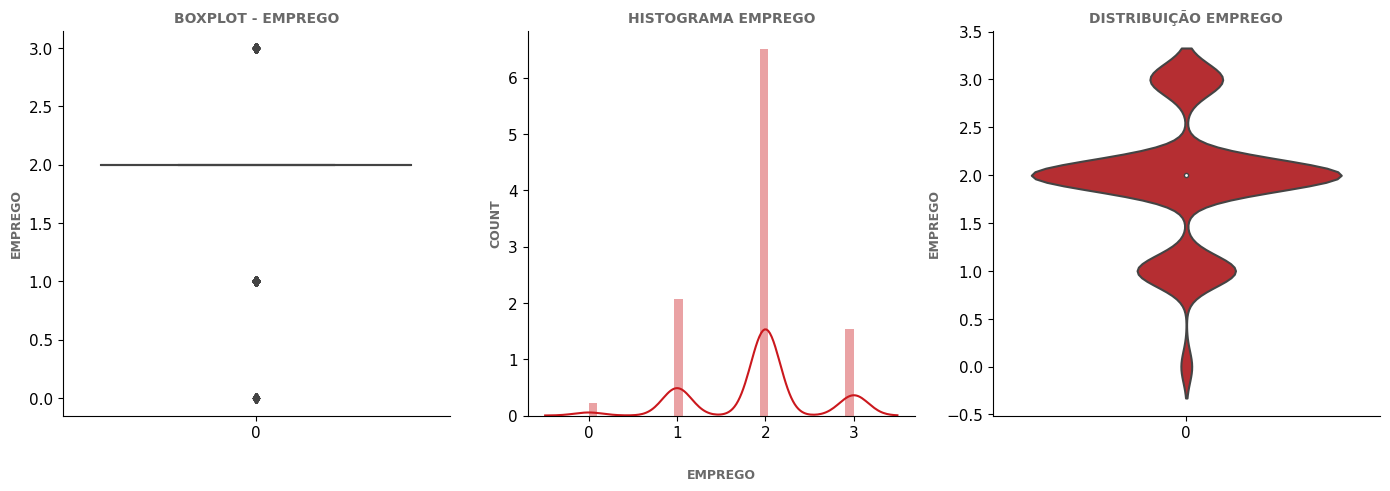

In [33]:
# Plot

plt.figure(figsize=(17,5))

plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11

plt.subplot(1, 3, 1)
sns.boxplot(df['emprego'], color='#cb181d')
sns.despine()
plt.title('BOXPLOT - EMPREGO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.ylabel('EMPREGO', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(1, 3, 2)
sns.distplot(df['emprego'], color='#cb181d')
sns.despine()
plt.title('HISTOGRAMA EMPREGO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('EMPREGO', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 9)
plt.ylabel('COUNT', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(1, 3, 3)
sns.violinplot(df['emprego'], color='#cb181d')
sns.despine()
plt.title('DISTRIBUIÇÃO EMPREGO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.ylabel('EMPREGO', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

fig.tight_layout()
plt.show();

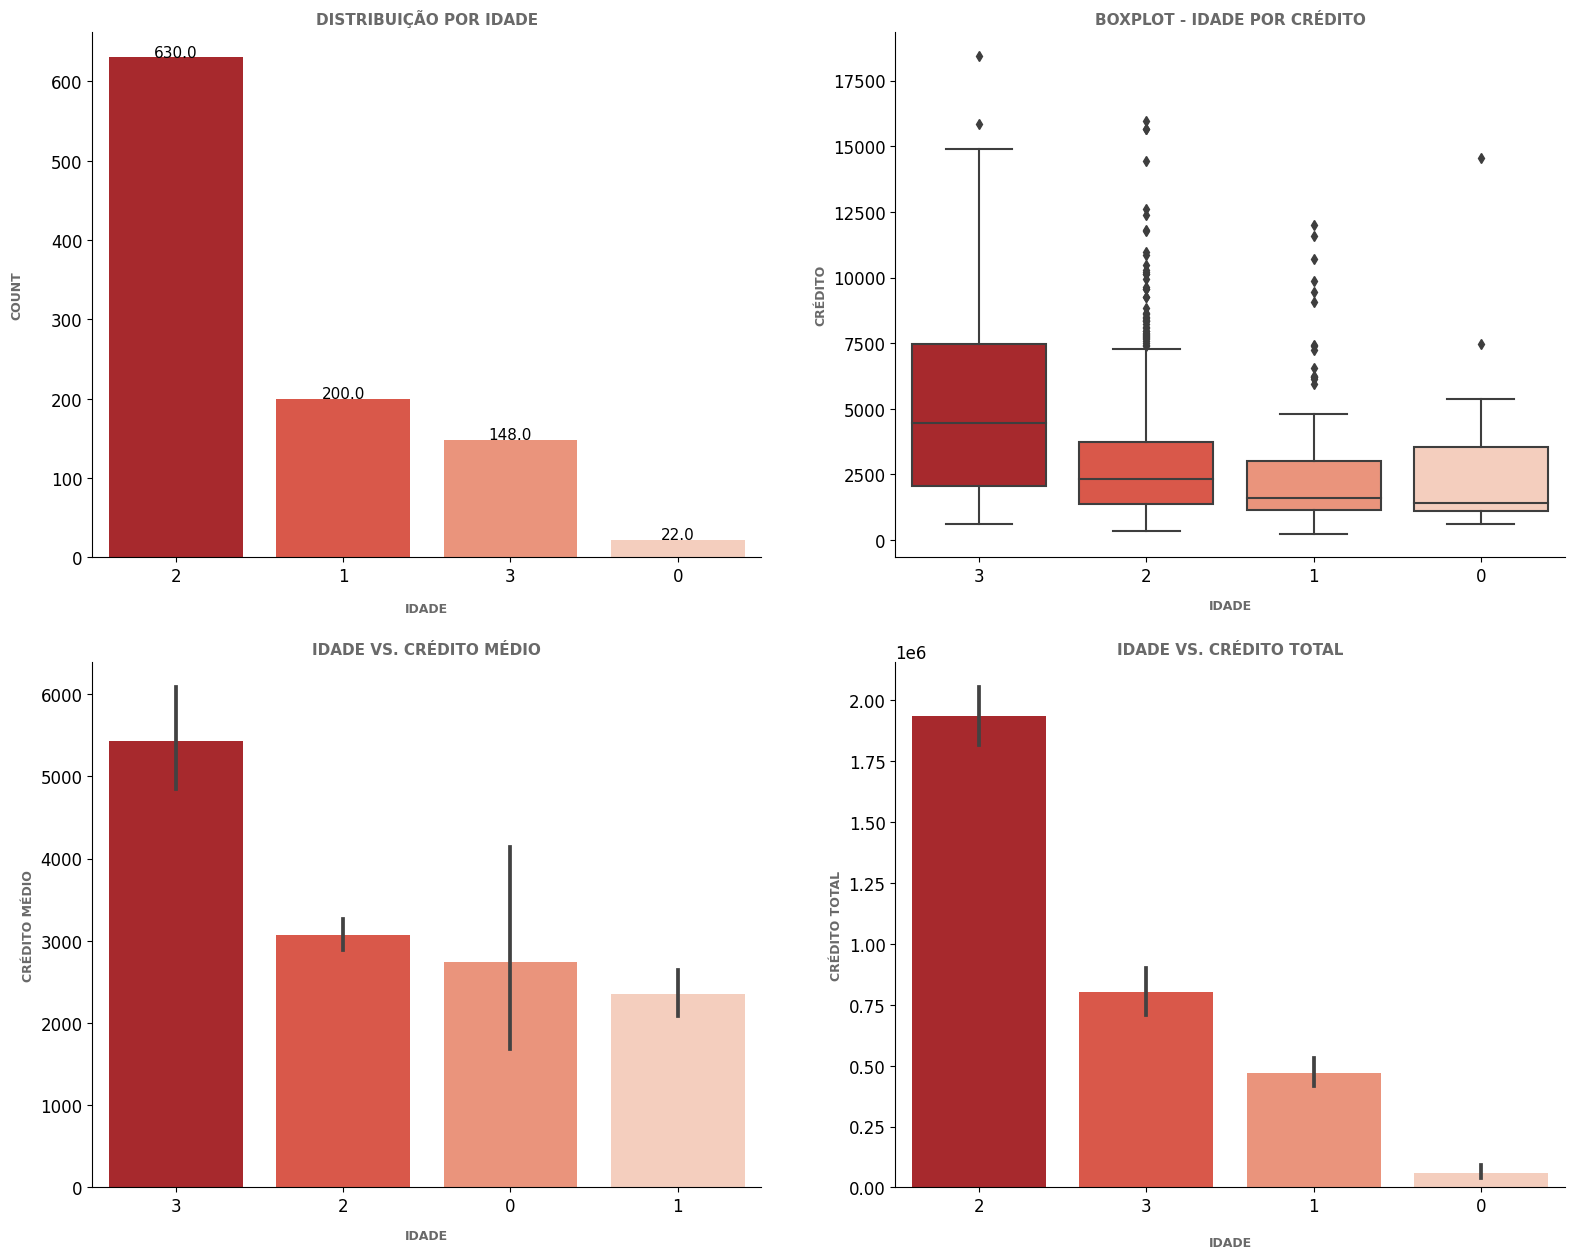

In [34]:
# Plot

plt.figure(figsize=(19,15))

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.subplot(2, 2, 1)
ax = sns.countplot(x='emprego', palette = 'Reds_r', data=df,order = df['emprego'].value_counts().index)
sns.despine()
plt.title('DISTRIBUIÇÃO POR IDADE', fontsize = 11, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    ax.text (p.get_x() + p.get_width()  / 2, p.get_height()+ 0.75, p.get_height(), horizontalalignment='center', fontsize = 11)
plt.xlabel('IDADE', color = 'dimgrey', labelpad = 12, fontweight = 'bold', fontsize = 9)
plt.ylabel('COUNT', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 9)

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='emprego', y='credito', palette = 'Reds_r', order = df.groupby(['emprego'])['credito'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - IDADE POR CRÉDITO', fontsize = 11, color ='dimgrey', fontweight = 'bold')
plt.xlabel('IDADE', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 9)
plt.ylabel('CRÉDITO', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(2, 2, 3)
sns.barplot(x = 'emprego', y = 'credito', data=df, palette = 'Reds_r', order = df.groupby(['emprego'])['credito'].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('IDADE VS. CRÉDITO MÉDIO', fontsize = 11, color ='dimgrey', fontweight = 'bold')
plt.xlabel('IDADE', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 9)
plt.ylabel('CRÉDITO MÉDIO', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(2, 2, 4)
sns.barplot(x = 'emprego', y = 'credito', data=df, palette = 'Reds_r', estimator=sum, order = df.groupby(['emprego'])['credito'].sum().sort_values(ascending=False).index)
sns.despine()
plt.title('IDADE VS. CRÉDITO TOTAL', fontsize = 11, color ='dimgrey', fontweight = 'bold')
plt.xlabel('IDADE', color = 'dimgrey', labelpad = 15, fontweight = 'bold', fontsize = 9)
plt.ylabel('CRÉDITO TOTAL', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

fig.tight_layout()
plt.show();

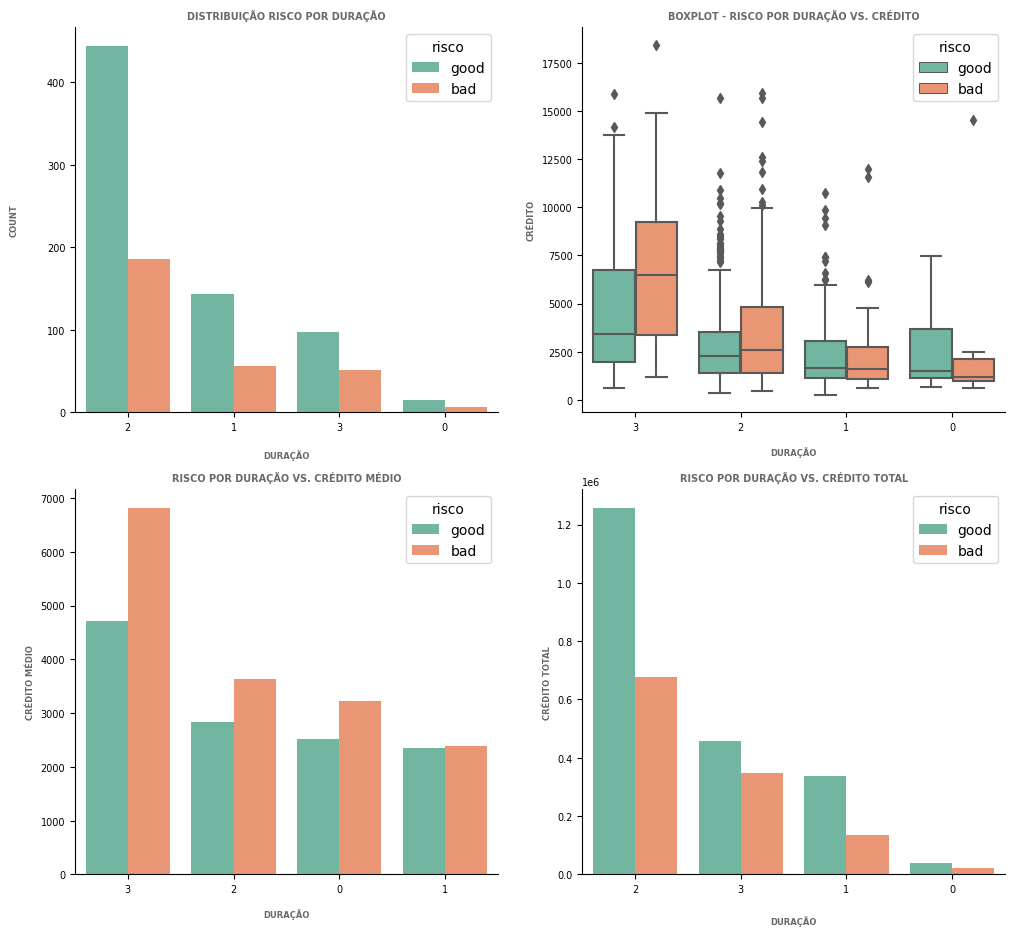

In [35]:
# Plot

plt.figure(figsize=(12,11))

plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7

plt.subplot(2, 2, 1)
sns.countplot(x='emprego', hue='risco', data=df, palette = 'Set2', order = df['emprego'].value_counts().index)
plt.title('DISTRIBUIÇÃO RISCO POR DURAÇÃO', fontsize = 7, color ='dimgrey', fontweight = 'bold')
plt.xlabel('DURAÇÃO', color = 'dimgrey', labelpad = 12, fontweight = 'bold', fontsize = 6)
plt.ylabel('COUNT', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 6)

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='emprego', y='credito', palette = 'Set2', hue='risco', order = df.groupby(["emprego"])["credito"].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - RISCO POR DURAÇÃO VS. CRÉDITO', fontsize = 7, color ='dimgrey', fontweight = 'bold')
plt.xlabel('DURAÇÃO', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 6)
plt.ylabel('CRÉDITO', color = 'dimgrey', fontweight = 'bold', fontsize = 6)

plt.subplot(2, 2, 3)
sns.barplot(x = 'emprego', y = 'credito', palette = 'Set2', hue='risco', data=df, ci=None, order = df.groupby(['emprego'])['credito'].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('RISCO POR DURAÇÃO VS. CRÉDITO MÉDIO', fontsize = 7, color ='dimgrey', fontweight = 'bold')
plt.xlabel('DURAÇÃO', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 6)
plt.ylabel('CRÉDITO MÉDIO', color = 'dimgrey', fontweight = 'bold', fontsize = 6)

plt.subplot(2, 2, 4)
sns.barplot(x = 'emprego', y = 'credito', palette = 'Set2', hue='risco', data=df, ci=None, estimator=sum, order = df.groupby(['emprego'])['credito'].sum().sort_values(ascending=False).index)
sns.despine()
plt.title('RISCO POR DURAÇÃO VS. CRÉDITO TOTAL', fontsize = 7, color ='dimgrey', fontweight = 'bold')
plt.xlabel('DURAÇÃO', color = 'dimgrey', labelpad = 15, fontweight = 'bold', fontsize = 6)
plt.ylabel('CRÉDITO TOTAL', color = 'dimgrey', fontweight = 'bold', fontsize = 6)

fig.tight_layout()
plt.show();

Coluna: Crédito

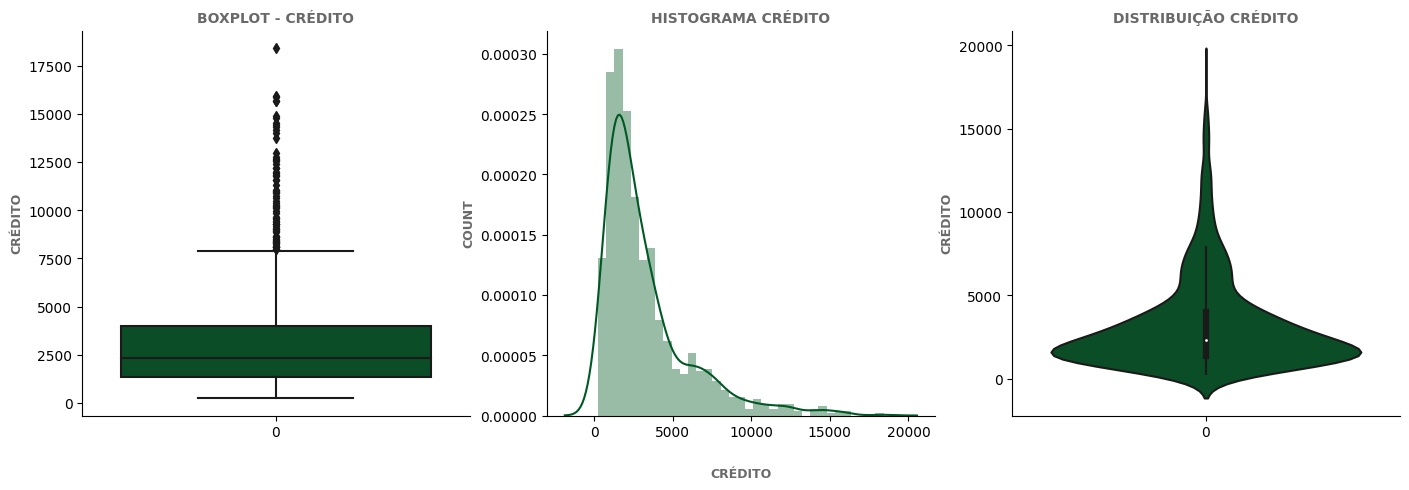

In [36]:
# Plot

plt.figure(figsize=(17,5))

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.subplot(1, 3, 1)
sns.boxplot(df['credito'], color='#005824')
sns.despine()
plt.title('BOXPLOT - CRÉDITO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.ylabel('CRÉDITO', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(1, 3, 2)
sns.distplot(df['credito'], color='#005824')
sns.despine()
plt.title('HISTOGRAMA CRÉDITO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CRÉDITO', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 9)
plt.ylabel('COUNT', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(1, 3, 3)
sns.violinplot(df['credito'], color='#005824')
sns.despine()
plt.title('DISTRIBUIÇÃO CRÉDITO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.ylabel('CRÉDITO', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

fig.tight_layout()
plt.show();

Coluna: Duração

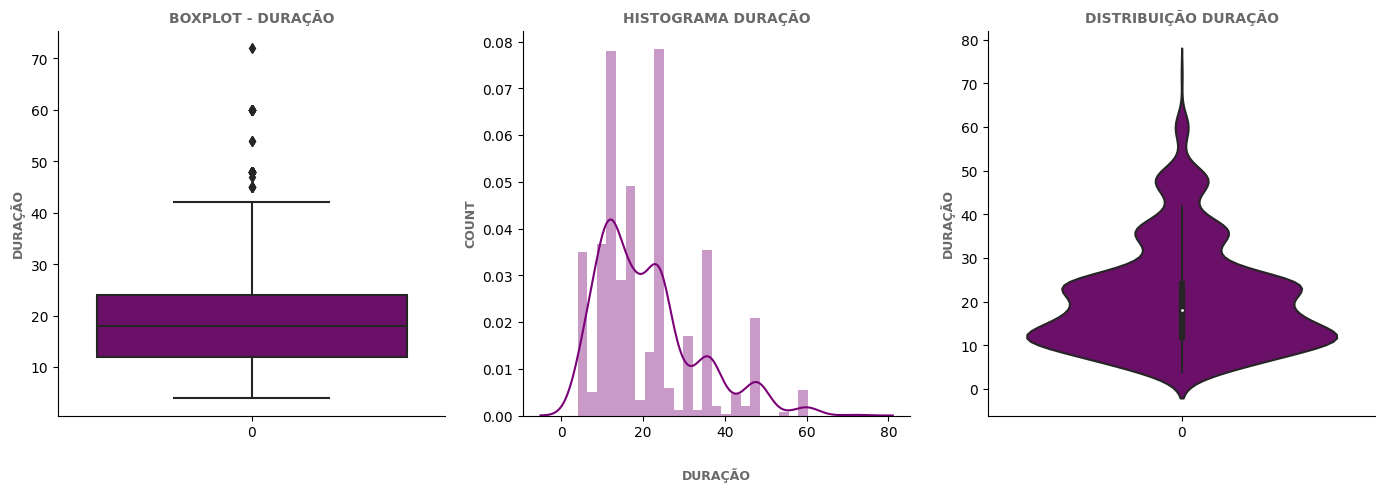

In [37]:
# Plot

plt.figure(figsize=(17,5))

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.subplot(1, 3, 1)
sns.boxplot(df['duracao'], color='#7a0177')
sns.despine()
plt.title('BOXPLOT - DURAÇÃO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.ylabel('DURAÇÃO', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(1, 3, 2)
sns.distplot(df['duracao'], color='#7a0177')
sns.despine()
plt.title('HISTOGRAMA DURAÇÃO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('DURAÇÃO', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 9)
plt.ylabel('COUNT', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

plt.subplot(1, 3, 3)
sns.violinplot(df['duracao'], color='#7a0177')
sns.despine()
plt.title('DISTRIBUIÇÃO DURAÇÃO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.ylabel('DURAÇÃO', color = 'dimgrey', fontweight = 'bold', fontsize = 9)

fig.tight_layout()
plt.show();

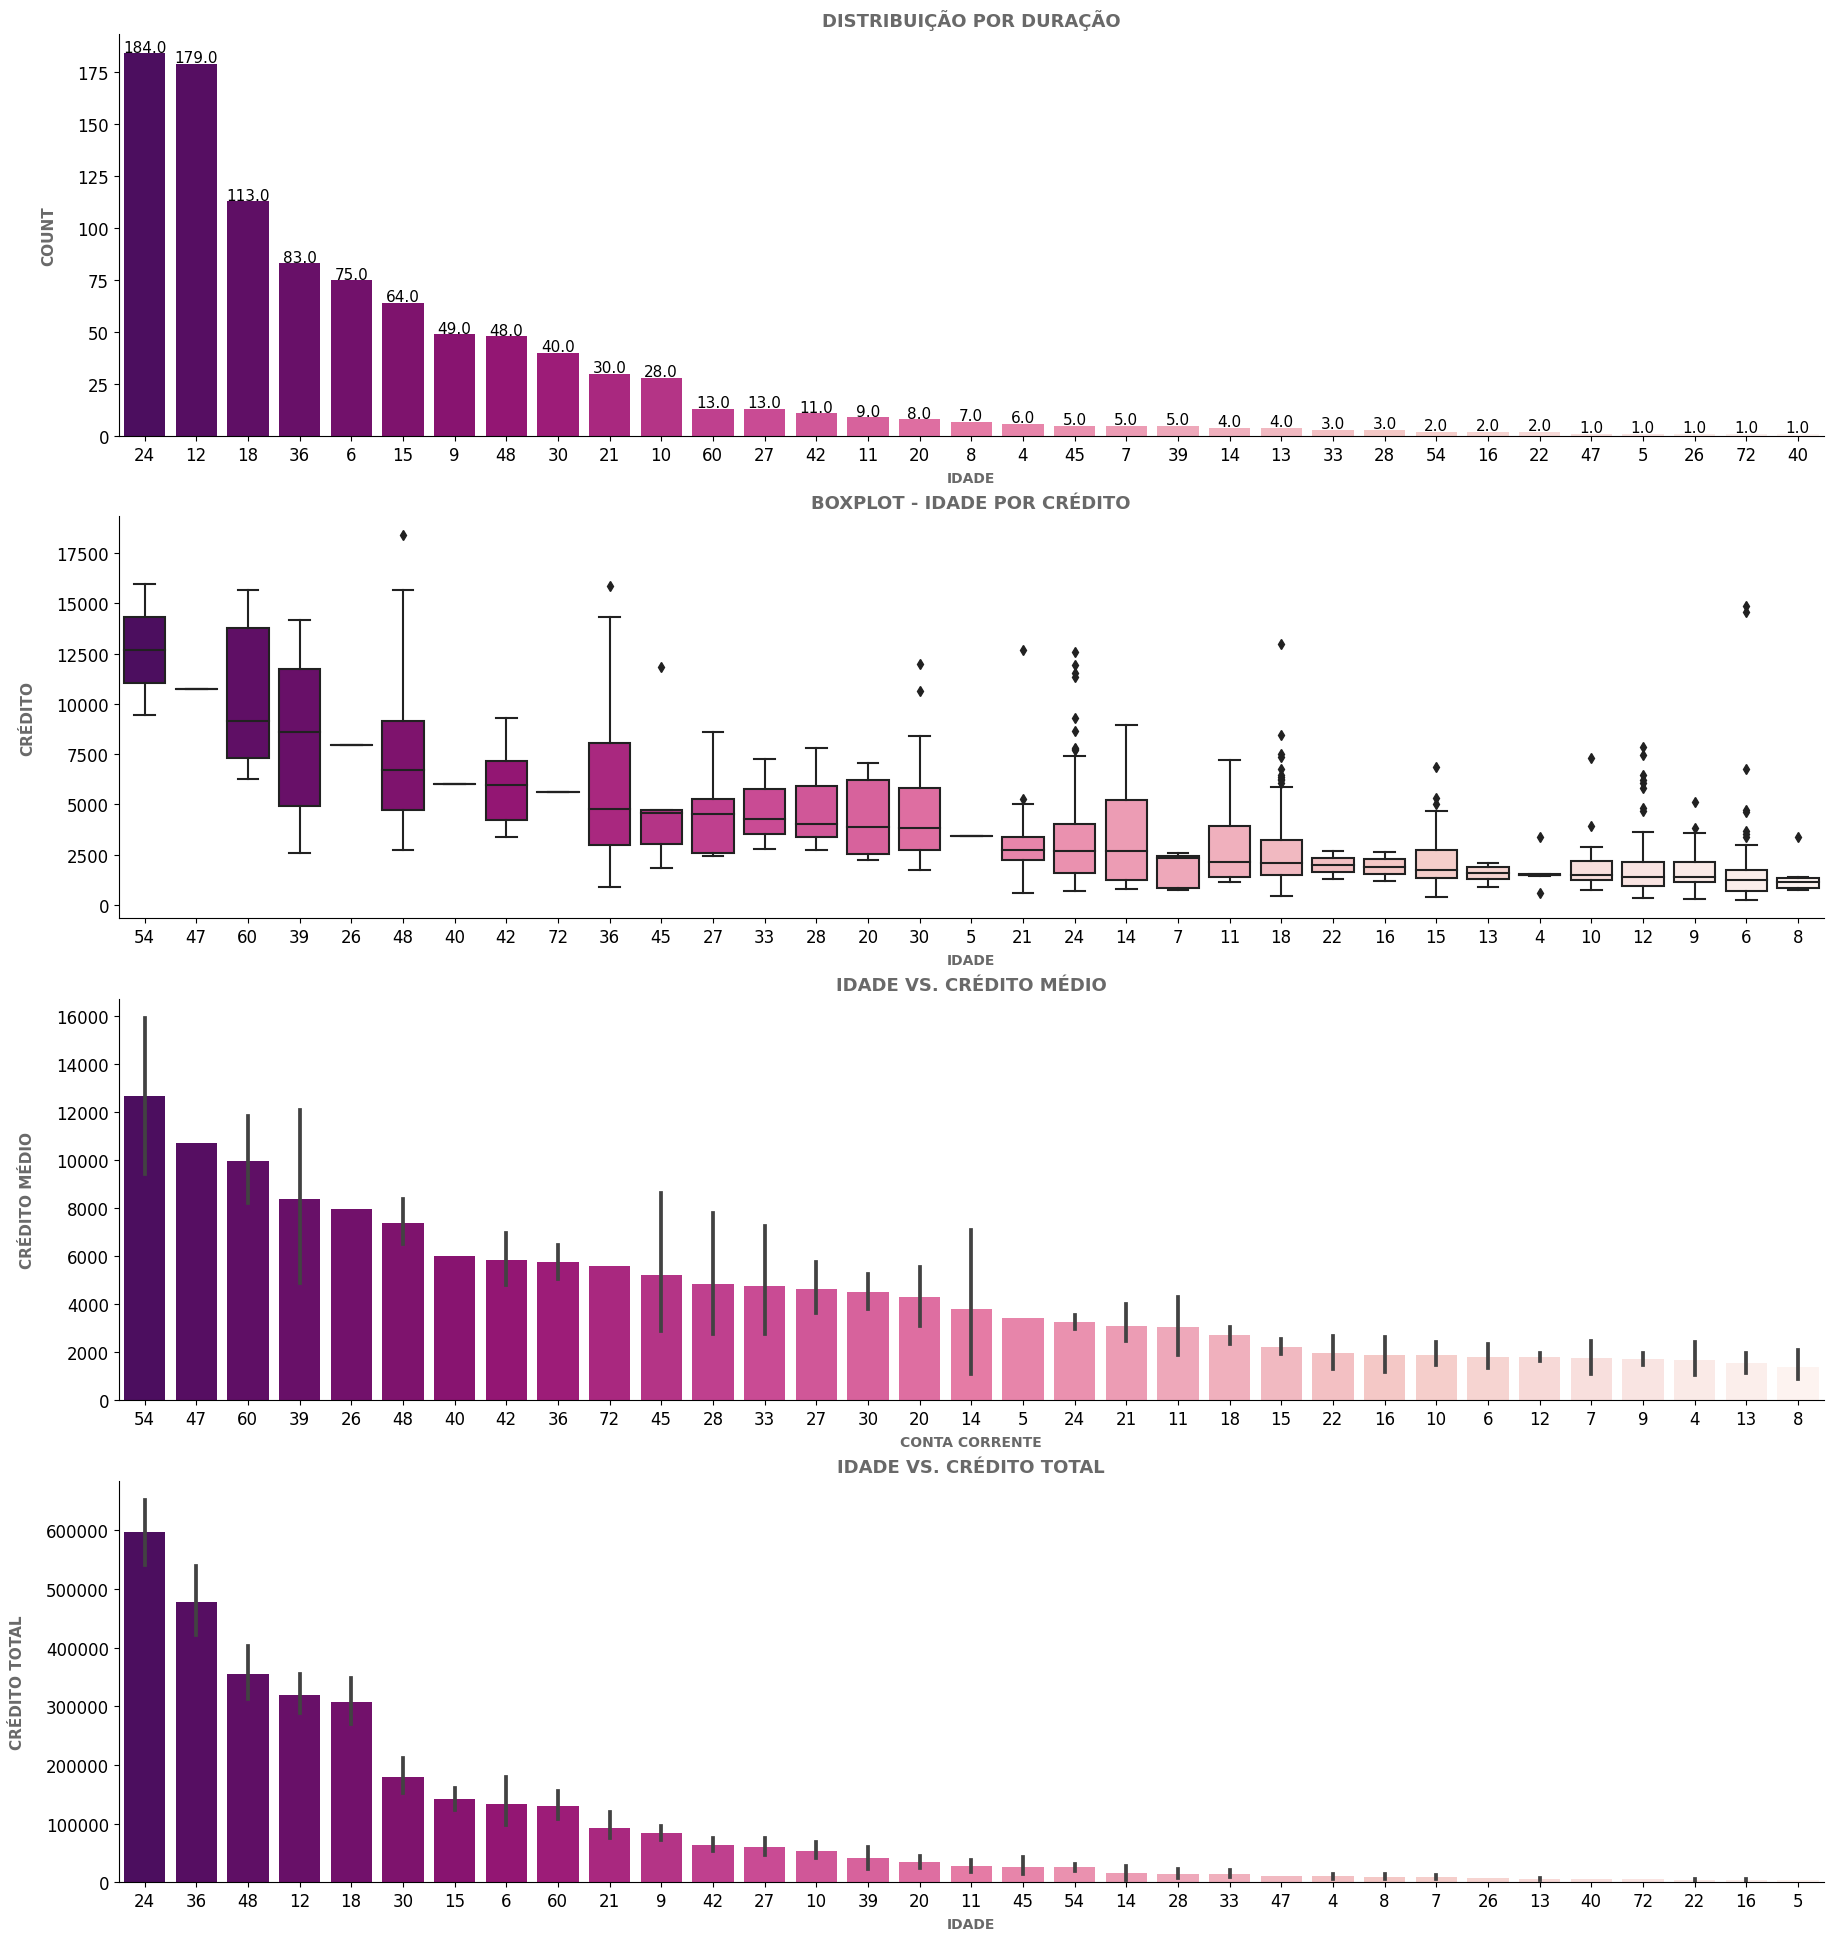

In [38]:
# Plot

plt.figure(figsize=(22,24))

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.subplot(4, 1, 1)
ax = sns.countplot(x='duracao', palette = 'RdPu_r', data=df,order = df['duracao'].value_counts().index)
sns.despine()
plt.title('DISTRIBUIÇÃO POR DURAÇÃO', fontsize = 13, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    ax.text (p.get_x() + p.get_width()  / 2, p.get_height()+ 0.75, p.get_height(), horizontalalignment='center', fontsize = 11)
plt.xlabel('IDADE', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 10)
plt.ylabel('COUNT', color = 'dimgrey', labelpad = 15, fontweight = 'bold', fontsize = 11)

plt.subplot(4, 1, 2)
sns.boxplot(data=df, x='duracao', y='credito', palette = 'RdPu_r', order = df.groupby(['duracao'])['credito'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - IDADE POR CRÉDITO', fontsize = 13, color ='dimgrey', fontweight = 'bold')
plt.xlabel('IDADE', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 10)
plt.ylabel('CRÉDITO', color = 'dimgrey', labelpad = 15, fontweight = 'bold', fontsize = 11)

plt.subplot(4, 1, 3)
sns.barplot(x = 'duracao', y = 'credito', data=df, palette = 'RdPu_r', order = df.groupby(['duracao'])['credito'].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('IDADE VS. CRÉDITO MÉDIO', fontsize = 13, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CONTA CORRENTE', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 10)
plt.ylabel('CRÉDITO MÉDIO', color = 'dimgrey', labelpad = 15, fontweight = 'bold', fontsize = 11)

plt.subplot(4, 1, 4)
sns.barplot(x = 'duracao', y = 'credito', data=df, palette = 'RdPu_r', estimator=sum, order = df.groupby(['duracao'])['credito'].sum().sort_values(ascending=False).index)
sns.despine()
plt.title('IDADE VS. CRÉDITO TOTAL', fontsize = 13, color ='dimgrey', fontweight = 'bold')
plt.xlabel('IDADE', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 10)
plt.ylabel('CRÉDITO TOTAL', color = 'dimgrey', labelpad = 15, fontweight = 'bold', fontsize = 11)

fig.tight_layout()
plt.show();

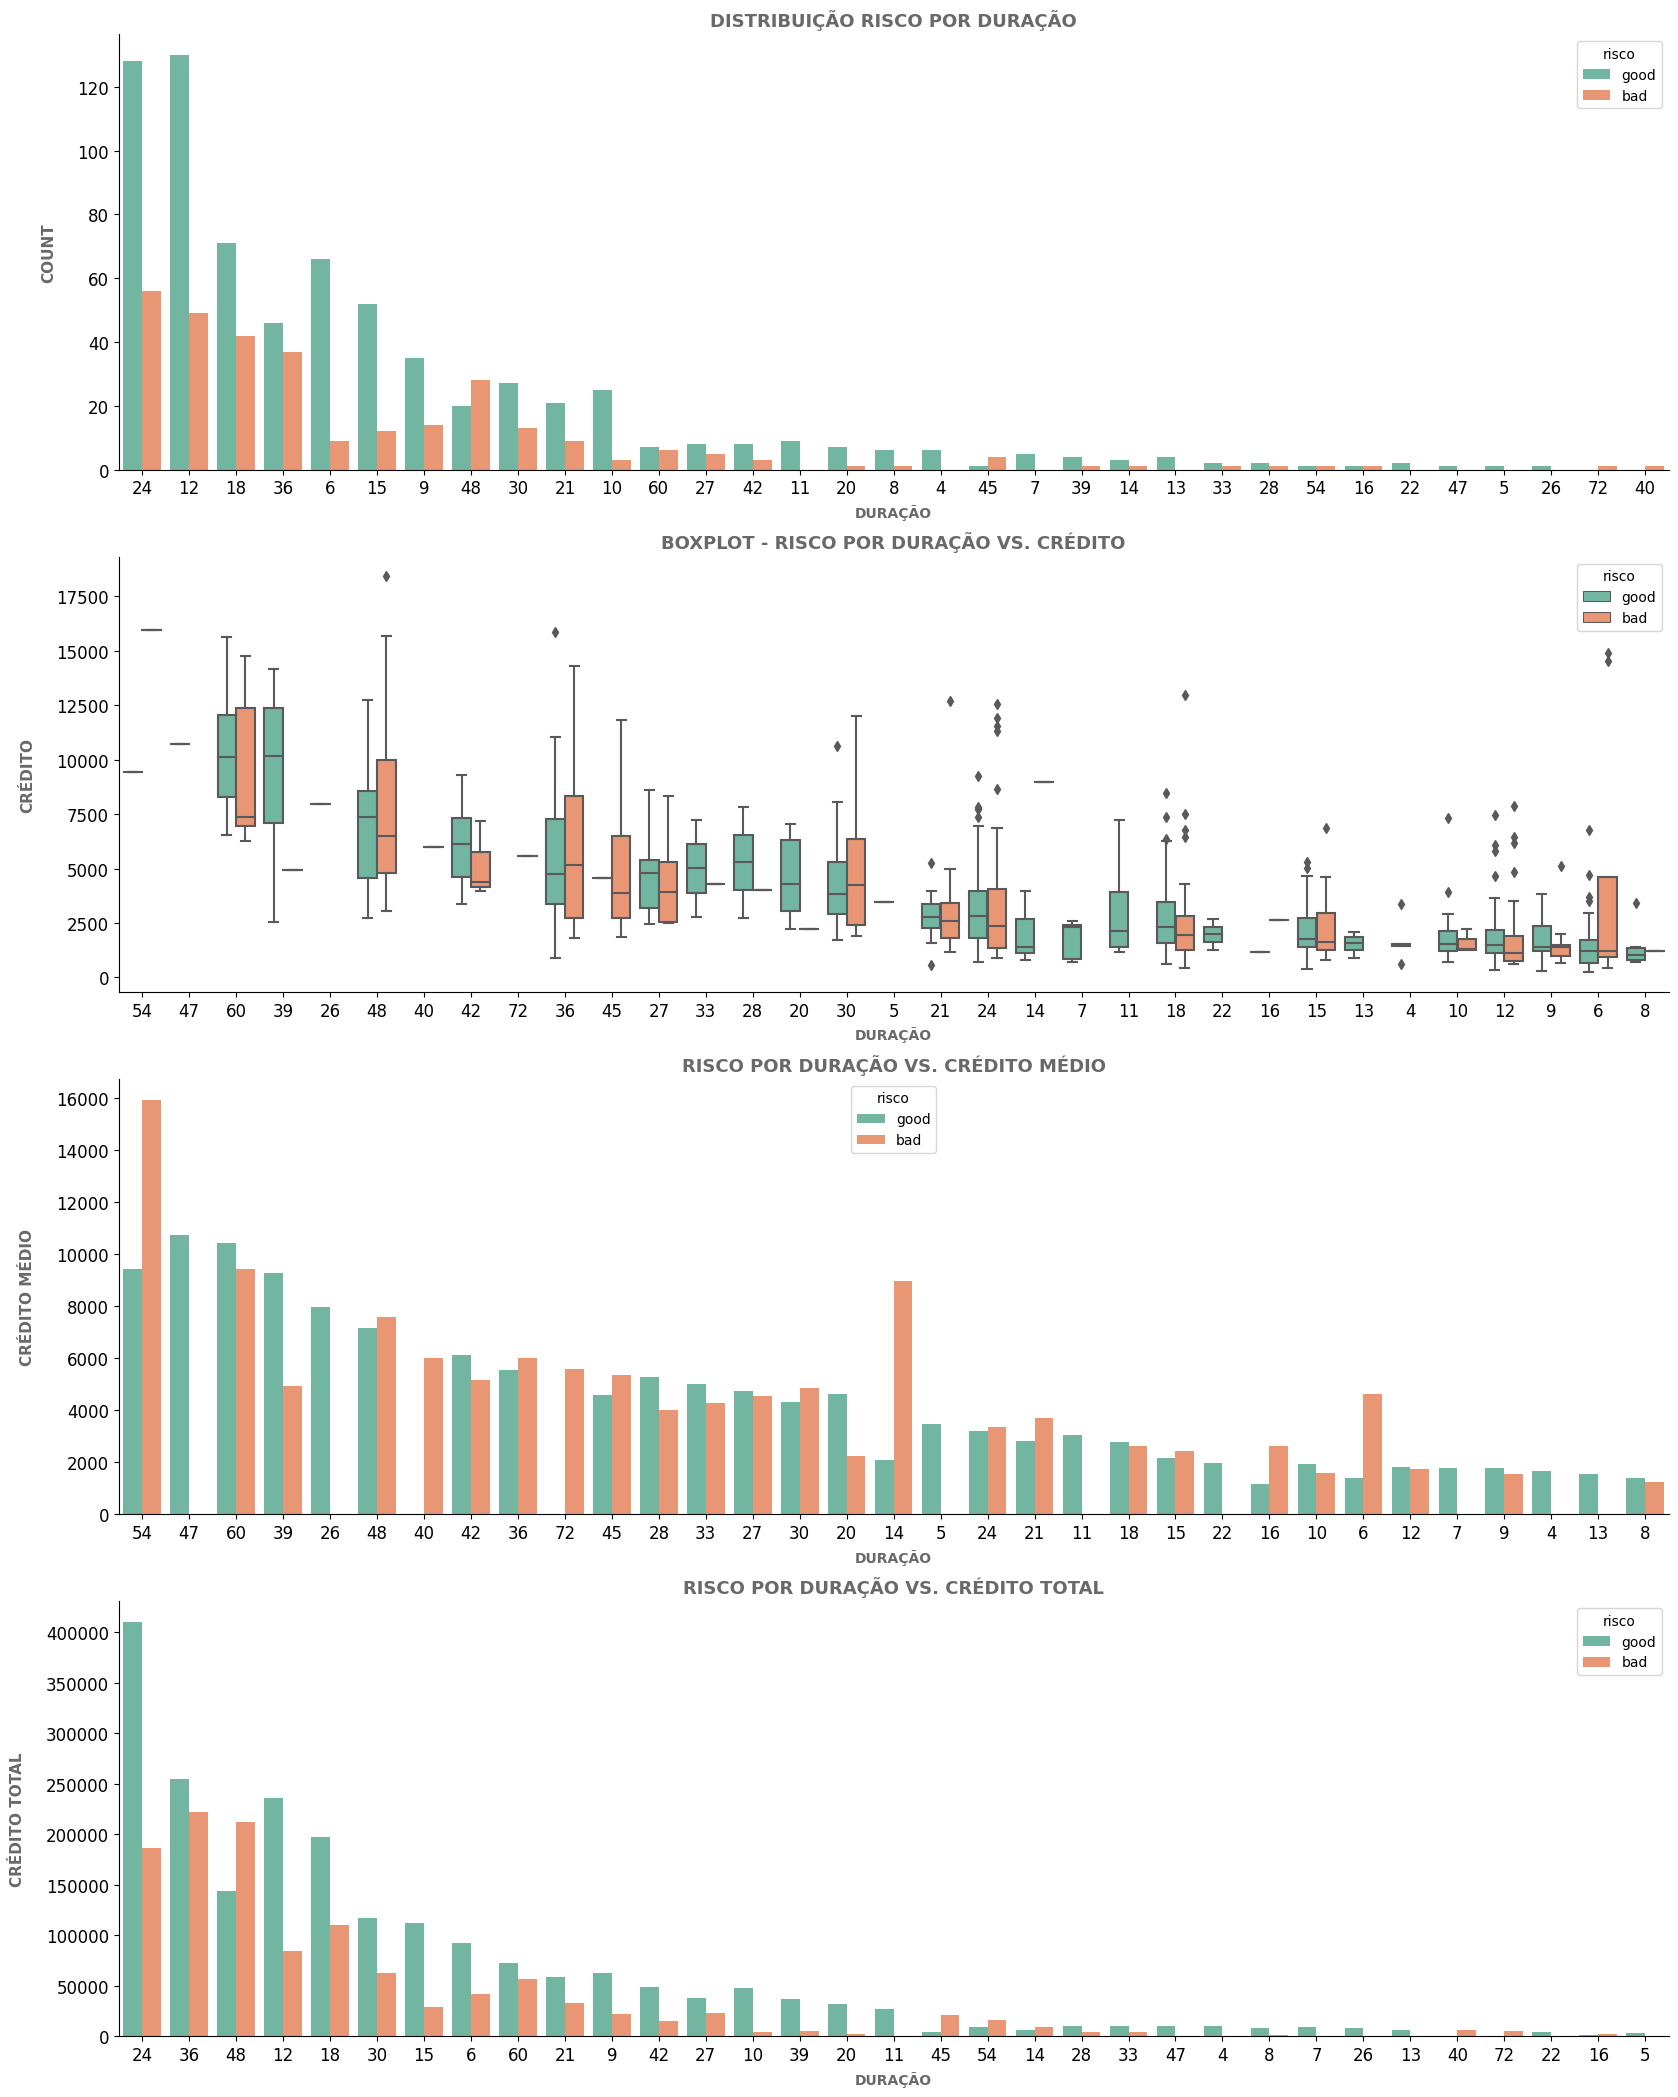

In [39]:
# Plot

plt.figure(figsize=(20,26))

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.subplot(4, 1, 1)
sns.countplot(x='duracao', hue='risco', data=df, palette = 'Set2', order = df['duracao'].value_counts().index)
plt.title('DISTRIBUIÇÃO RISCO POR DURAÇÃO', fontsize = 13, color ='dimgrey', fontweight = 'bold')
plt.xlabel('DURAÇÃO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 10)
plt.ylabel('COUNT', color = 'dimgrey', labelpad = 15, fontweight = 'bold', fontsize = 11)

plt.subplot(4, 1, 2)
sns.boxplot(data=df, x='duracao', y='credito', palette = 'Set2', hue='risco', order = df.groupby(["duracao"])["credito"].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - RISCO POR DURAÇÃO VS. CRÉDITO', fontsize = 13, color ='dimgrey', fontweight = 'bold')
plt.xlabel('DURAÇÃO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 10)
plt.ylabel('CRÉDITO', color = 'dimgrey', labelpad = 15, fontweight = 'bold', fontsize = 11)

plt.subplot(4, 1, 3)
sns.barplot(x = 'duracao', y = 'credito', palette = 'Set2', hue='risco', data=df, ci=None, order = df.groupby(['duracao'])['credito'].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('RISCO POR DURAÇÃO VS. CRÉDITO MÉDIO', fontsize = 13, color ='dimgrey', fontweight = 'bold')
plt.xlabel('DURAÇÃO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 10)
plt.ylabel('CRÉDITO MÉDIO', color = 'dimgrey', labelpad = 15, fontweight = 'bold', fontsize = 11)

plt.subplot(4, 1, 4)
sns.barplot(x = 'duracao', y = 'credito', palette = 'Set2', hue='risco', data=df, ci=None, estimator=sum, order = df.groupby(['duracao'])['credito'].sum().sort_values(ascending=False).index)
sns.despine()
plt.title('RISCO POR DURAÇÃO VS. CRÉDITO TOTAL', fontsize = 13, color ='dimgrey', fontweight = 'bold')
plt.xlabel('DURAÇÃO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 10)
plt.ylabel('CRÉDITO TOTAL', color = 'dimgrey', fontweight = 'bold', labelpad = 15, fontsize = 11)

fig.tight_layout()
plt.show();

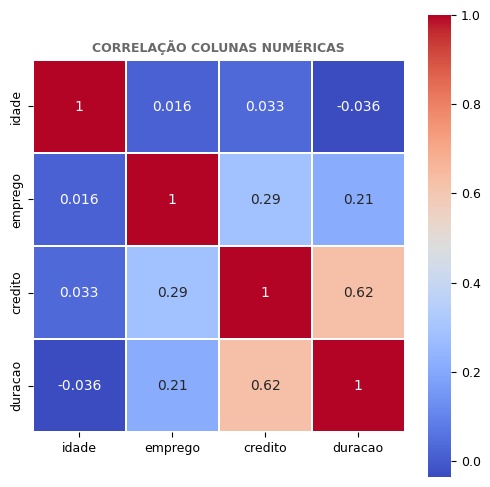

In [40]:
# Correlação entre as colunas

plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9

plt.figure(figsize=(6,6)) 
sns.heatmap(data=df.corr(),annot=True,linewidths=0.2,cmap='coolwarm', square=True);
plt.title('CORRELAÇÃO COLUNAS NUMÉRICAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.show();

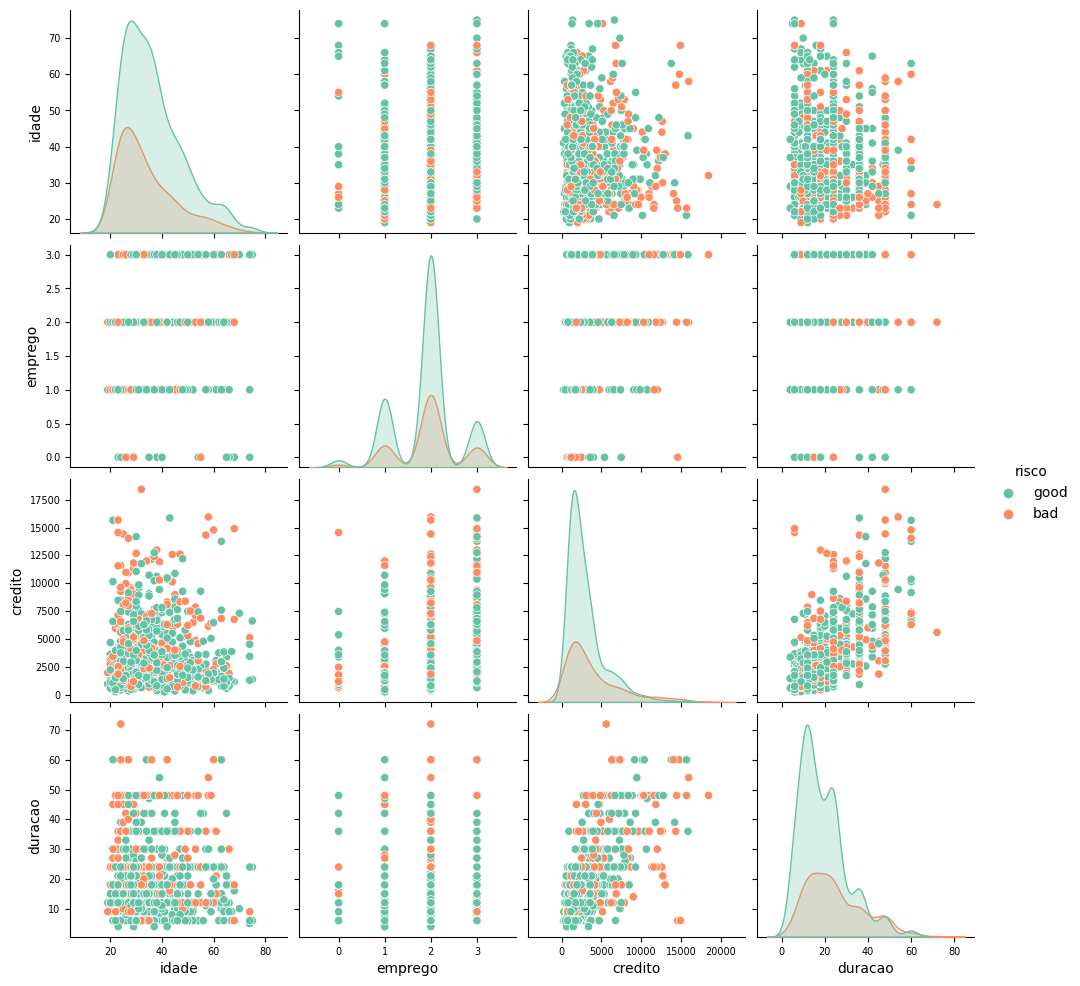

In [41]:
# Plot
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7

sns.pairplot(df,hue='risco', palette='Set2');

# 2. Pré-processamento - Pipeline

In [42]:
# Transformação da coluna emprego em tipo categórico
df['emprego'] = df['emprego'].astype('category')

In [43]:
# Redefinição do risco em 0 para bom e 1 para ruim
df['risco'] = np.where(df['risco']=='bad', 1, 0)
df.head()

,idade,sexo,emprego,habitacao,conta_poupanca,conta_corrente,credito,duracao,proposito,risco
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [44]:
# Separação das variáveis preditoras da variável alvo
X = df.drop(columns='risco') 
Y = df['risco']

In [45]:
# Divisão do Dataset em treino e test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=18)

**2.1 - Pipeline Valores Nulos**

In [46]:
# Pipeline somente para Valores Nulos

cols_nulos = ['conta_poupanca', 'conta_corrente']
preprocessor = ColumnTransformer(
    transformers=[
        ('imputer', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
            cols_nulos),
])

preprocessor.fit(X_train)
X_train_new = preprocessor.transform(X_train)
X_test_new = preprocessor.transform(X_test)

for icol, col in enumerate(cols_nulos):
    X_train.loc[:, col] = X_train_new[:, icol]
    X_test.loc[:, col] = X_test_new[:, icol]

In [47]:
# Valores nulos em X_train
X_train.isnull().sum().sort_values(ascending=False)

idade             0
sexo              0
emprego           0
habitacao         0
conta_poupanca    0
conta_corrente    0
credito           0
duracao           0
proposito         0
dtype: int64

In [48]:
# Valores nulos em X_test
X_test.isnull().sum().sort_values(ascending=False)

idade             0
sexo              0
emprego           0
habitacao         0
conta_poupanca    0
conta_corrente    0
credito           0
duracao           0
proposito         0
dtype: int64

**OBS: Vamos utilizar um Pipeline para alguns algoritmos e outro Pipeline somente para algoritmos baseados em árvores. Esta distinção é feita porque algoritmos baseados em árvores não precisam que os dados estejam em escala, ou seja, normalizados ou padronizados. Além de que, para esses algoritmos OrdinalEncoder funciona melhor do que OneHotEncoder.**
Fonte: https://inria.github.io/scikit-learn-mooc/python_scripts/03_categorical_pipeline.html

# 3. Pipeline 1 - Algoritmos Abrangentes (Classes Desbalanceadas)

In [49]:
# Pipeline 1

preprocessor1 = ColumnTransformer(
transformers=[
    ('OneHotEncoder', OneHotEncoder(), ['sexo', 'habitacao', 'conta_poupanca', 'conta_corrente', 'proposito', 'emprego']),
    ('Padronização', StandardScaler(), ['idade', 'credito', 'duracao'])])

**Acurácia - Cross validation**

Primeiramente vamos verrificar a performance geral dos modelos através da acurácia.

In [50]:
# Avalição dos Modelos Preditivos

# Lista de modelos
modelos = []
modelos.append(('KNeighborsClassifier', KNeighborsClassifier()))
modelos.append(('SVC', SVC(random_state=18)))
modelos.append(('LogisticRegression', LogisticRegression(random_state=18)))
modelos.append(('GaussianNB', GaussianNB()))
modelos.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))

nomes = []
resultados = []
resultados_mean = []
resultados_std = []

# Definindo os valores para o número de folds 
num_folds = 10
seed = 18

# Avaliando cada modelo em um loop 
for nome, modelo in modelos:
    clf = Pipeline(steps=[("preprocessor", preprocessor1), ("Modelos", modelo)])
    kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
    cv_results = cross_val_score(clf, X_train, Y_train, cv = kfold, scoring='accuracy')
    resultados.append(cv_results)
    resultados_mean.append(cv_results.mean()*100)
    resultados_std.append(cv_results.std()*100)
    nomes.append(nome)

# Resultados    
model_result = pd.DataFrame({
'Modelo': nomes,
'Mean': resultados_mean,
'STD': resultados_std})

model_result.sort_values('Mean', ascending=False)

,Modelo,Mean,STD
1,SVC,72.125,4.712019
2,LogisticRegression,71.125,6.695381
4,LinearDiscriminantAnalysis,70.750,6.595453
0,KNeighborsClassifier,67.875,5.245534
3,GaussianNB,62.250,3.984344


Por meio da análise exploratória feita verificamos que estamos lidando com classes desbalanceadas, neste caso a acurácia não é a melhor métrica para avaliar os modelos, visto que ela nos diz quantos de nossos exemplos foram de fato classificados corretamente independente da classe, mas o padrão dos dados para o valor dominante vai se sobressair em relação aos do valor com menor frequência. Portanto, muitas vezes o modelo classificaria a classe minoritária erroneamente, por isso podemos ter uma acurácia alta e mesmo assim o modelo ter um desempenho impreciso. Diante disso, vamos avaliar nossos modelos a partir de outras métricas.

**Confusion Matrix e Classification Report**

In [51]:
# Avalição dos Modelos Preditivos

# Lista de modelos
modelos = [KNeighborsClassifier(),
          SVC(random_state=18),
          LogisticRegression(random_state=18),
          GaussianNB(),
          LinearDiscriminantAnalysis(),
          ]

# Avaliando cada modelo em um loop
for modelo in modelos:
    clf = Pipeline(steps=[('preprocessor', preprocessor1), ('modelo', modelo)])
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print(modelo)
    print('\n')
    print(confusion_matrix(Y_test, Y_pred))
    print('\n')
    print(classification_report(Y_test, Y_pred))
    print('_____________________________________________________\n')

KNeighborsClassifier()


[[112  19]
 [ 56  13]]


              precision    recall  f1-score   support

           0       0.67      0.85      0.75       131
           1       0.41      0.19      0.26        69

    accuracy                           0.62       200
   macro avg       0.54      0.52      0.50       200
weighted avg       0.58      0.62      0.58       200

_____________________________________________________

SVC(random_state=18)


[[122   9]
 [ 61   8]]


              precision    recall  f1-score   support

           0       0.67      0.93      0.78       131
           1       0.47      0.12      0.19        69

    accuracy                           0.65       200
   macro avg       0.57      0.52      0.48       200
weighted avg       0.60      0.65      0.57       200

_____________________________________________________

LogisticRegression(random_state=18)


[[122   9]
 [ 56  13]]


              precision    recall  f1-score   support

           0       0

Como nosso objetivo principal é prever os casos em que o empréstimo foi ruim, neste cenário, a métrica mais adequada para efetuar a avaliação do modelo é o recall, quanto mais próximo o valor de recall estiver de 1, mais êxito o modelo terá em identificar todos os empréstimos ruins.

Entretanto, como foi verificado que estamos lidando com classes desbalanceadas, devido a este fato devemos ficar atentos também à matriz de confusão e ao f1-score para se ter uma melhor visão dos erros falsos positivos e falsos negativos. Pois, podemos ter um excesso de bons empréstimos que foram previstos como maus, gerando outro tipo de dor de cabeça, isso ocorre porque aumentamos nossa pontuação de recall de empréstimos ruins à custa de mais casos legítimos mal classificados. Perante o exposto, vamos tentar achar um modelo que seja razoavelmente equilibrado em relação a isso.

Em resumo, neste projeto vamos definir as métricas para a escolha do modelo como sendo:

- Maior valor de recall
- Maior valor de f1-score
- A diferença entre falsos positivos e falsos negativos não ser acima de 50, de modo a manter um certo equilíbrio.

**OBS:** Entre os modelos testados, GaussianNB foi o que apresentou o resultado mais satisfatório para dados desbalanceados.

# 3.2 - Tentativas de Tratamento do Desbalanceamento

**OBS:** Recall e Precision geralmente são compensações um do outro, portanto, quando você pode melhorar os dois ao mesmo tempo, o desempenho geral do seu modelo é inegavelmente aprimorado.

**Class Weight = 'balanced'**

Testar Class Weight = 'balanced' para algoritmos que possuem este parâmetro.

In [52]:
# Avalição dos Modelos Preditivos

# Lista de modelos
modelos = [KNeighborsClassifier(weights='distance'),
          SVC(random_state=18, class_weight='balanced'),
          LogisticRegression(random_state=18, class_weight='balanced')
          ]

# Avaliando cada modelo em um loop
for modelo in modelos:
    clf = Pipeline(steps=[('preprocessor', preprocessor1), ('modelo', modelo)])
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print(modelo)
    print('\n')
    print(confusion_matrix(Y_test, Y_pred))
    print('\n')
    print(classification_report(Y_test, Y_pred))
    print('_____________________________________________________\n')

KNeighborsClassifier(weights='distance')


[[109  22]
 [ 50  19]]


              precision    recall  f1-score   support

           0       0.69      0.83      0.75       131
           1       0.46      0.28      0.35        69

    accuracy                           0.64       200
   macro avg       0.57      0.55      0.55       200
weighted avg       0.61      0.64      0.61       200

_____________________________________________________

SVC(class_weight='balanced', random_state=18)


[[95 36]
 [27 42]]


              precision    recall  f1-score   support

           0       0.78      0.73      0.75       131
           1       0.54      0.61      0.57        69

    accuracy                           0.69       200
   macro avg       0.66      0.67      0.66       200
weighted avg       0.70      0.69      0.69       200

_____________________________________________________

LogisticRegression(class_weight='balanced', random_state=18)


[[84 47]
 [20 49]]


              p

**OBS:** LogisticRegression foi o que apresentou melhor resultado utilizando-se o parâmetro class_weight='balanced'.

**Class Weight - Diversos Valores**

Como a classe 0 têm 700 registros e a classe 1 têm 300, ao fazer a divisão 700/300 obtemos 2.33, vamos testar valores no entorno deste número em algoritmos que detenham este parâmetro.

**SVC**

In [53]:
# Encontrar o Melhor Parâmetro de Pesos com GridSearchCV

PLsvc = Pipeline(steps=[('preprocessor', preprocessor1), ('modelo', SVC(random_state=18))])

# Definindo os valores para o número de folds 
num_folds = 10
seed = 18
kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)

pesos = np.linspace(1.0, 5.0, num=10)
param_grid = [{'modelo__class_weight':[{0:1,1:p} for p in pesos]}]

grind_svc = GridSearchCV(PLsvc, param_grid = param_grid, cv = kfold, verbose=True, n_jobs=-1, scoring='recall')
grind_svc.fit(X_train, Y_train)

print('\n')
print('Melhor Score:', grind_svc.best_score_)
print('Melhor Parâmetro de Pesos:', grind_svc.best_params_)
print('\n')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Melhor Score: 0.7879036771771326
Melhor Parâmetro de Pesos: {'modelo__class_weight': {0: 1, 1: 5.0}}




In [54]:
# Encontrar o Melhor Parâmetro de Pesos com GridSearchCV

PLsvc = Pipeline(steps=[('preprocessor', preprocessor1), ('modelo', SVC(random_state=18))])

# Definindo os valores para o número de folds 
num_folds = 10
seed = 18
kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)

#GridSearchCV
pesos = np.linspace(1.0, 5.0, num=10)
param_grid = [{'modelo__class_weight':[{0:1,1:p} for p in pesos]}]

grind_svc = GridSearchCV(PLsvc, param_grid = param_grid, cv = kfold, verbose=True, n_jobs=-1, scoring='f1')
grind_svc.fit(X_train, Y_train)

print('\n')
print('Melhor Score:', grind_svc.best_score_)
print('Melhor Parâmetro de Pesos:', grind_svc.best_params_)
print('\n')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Melhor Score: 0.47578724246098814
Melhor Parâmetro de Pesos: {'modelo__class_weight': {0: 1, 1: 3.6666666666666665}}




In [55]:
# Avaliar diversos valores diferentes de pesos para a classe 1

for p in np.linspace(1.0, 5.0, num=10):
    print('---Peso {} para a classe 1---'.format(p))
    PLsvc = Pipeline(steps=[('preprocessor', preprocessor1), ('modelo', SVC(random_state=18, class_weight={0:1,1:p}))])
    PLsvc.fit(X_train, Y_train)
    Y_pred = PLsvc.predict(X_test)
    print('\n')
    print(confusion_matrix(Y_test, Y_pred))
    print('\n')
    print(classification_report(Y_test, Y_pred))

---Peso 1.0 para a classe 1---


[[122   9]
 [ 61   8]]


              precision    recall  f1-score   support

           0       0.67      0.93      0.78       131
           1       0.47      0.12      0.19        69

    accuracy                           0.65       200
   macro avg       0.57      0.52      0.48       200
weighted avg       0.60      0.65      0.57       200

---Peso 1.4444444444444444 para a classe 1---


[[113  18]
 [ 47  22]]


              precision    recall  f1-score   support

           0       0.71      0.86      0.78       131
           1       0.55      0.32      0.40        69

    accuracy                           0.68       200
   macro avg       0.63      0.59      0.59       200
weighted avg       0.65      0.68      0.65       200

---Peso 1.8888888888888888 para a classe 1---


[[107  24]
 [ 39  30]]


              precision    recall  f1-score   support

           0       0.73      0.82      0.77       131
           1       0.56      0.43

**OBS:** O peso de 3.22 para a classe 1 apresentou o melhor resultado.

**LogisticRegression**

In [56]:
# Encontrar o Melhor Parâmetro de Pesos com GridSearchCV

PLlr = Pipeline(steps=[('preprocessor', preprocessor1), ('modelo', LogisticRegression(random_state=18))])

# Definindo os valores para o número de folds 
num_folds = 10
seed = 18
kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)

#GridSearchCV
pesos = np.linspace(1.0, 5.0, num=10)
param_grid = [{'modelo__class_weight':[{0:1,1:p} for p in pesos]}]

grind_lr = GridSearchCV(PLlr, param_grid = param_grid, cv = kfold, verbose=True, n_jobs=-1, scoring='recall')
grind_lr.fit(X_train, Y_train)

print('\n')
print('Melhor Score:', grind_lr.best_score_)
print('Melhor Parâmetro de Pesos:', grind_lr.best_params_)
print('\n')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Melhor Score: 0.8939575965605714
Melhor Parâmetro de Pesos: {'modelo__class_weight': {0: 1, 1: 5.0}}




In [57]:
# Encontrar o Melhor Parâmetro de Pesos com GridSearchCV

PLlr = Pipeline(steps=[('preprocessor', preprocessor1), ('modelo', LogisticRegression(random_state=18))])

# Definindo os valores para o número de folds 
num_folds = 10
seed = 18
kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)

#GridSearchCV
pesos = np.linspace(1.0, 5.0, num=10)
param_grid = [{'modelo__class_weight':[{0:1,1:p} for p in pesos]}]

grind_lr = GridSearchCV(PLlr, param_grid = param_grid, cv = kfold, verbose=True, n_jobs=-1, scoring='f1')
grind_lr.fit(X_train, Y_train)

print('\n')
print('Melhor Score:', grind_lr.best_score_)
print('Melhor Parâmetro de Pesos:', grind_lr.best_params_)
print('\n')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Melhor Score: 0.46634994981135974
Melhor Parâmetro de Pesos: {'modelo__class_weight': {0: 1, 1: 4.111111111111111}}




In [58]:
# Avaliar diversos valores diferentes de pesos para a classe 1

for p in np.linspace(1.0, 5.0, num=10):
    print('---Peso {} para a classe 1---'.format(p))
    PLlr = Pipeline(steps=[('preprocessor', preprocessor1), ('modelo', LogisticRegression(random_state=18, class_weight={0:1,1:p}))])
    PLlr.fit(X_train, Y_train)
    Y_pred = PLlr.predict(X_test)
    print('\n')
    print(confusion_matrix(Y_test, Y_pred))
    print('\n')
    print(classification_report(Y_test, Y_pred))

---Peso 1.0 para a classe 1---


[[122   9]
 [ 56  13]]


              precision    recall  f1-score   support

           0       0.69      0.93      0.79       131
           1       0.59      0.19      0.29        69

    accuracy                           0.68       200
   macro avg       0.64      0.56      0.54       200
weighted avg       0.65      0.68      0.62       200

---Peso 1.4444444444444444 para a classe 1---


[[113  18]
 [ 45  24]]


              precision    recall  f1-score   support

           0       0.72      0.86      0.78       131
           1       0.57      0.35      0.43        69

    accuracy                           0.69       200
   macro avg       0.64      0.61      0.61       200
weighted avg       0.67      0.69      0.66       200

---Peso 1.8888888888888888 para a classe 1---


[[100  31]
 [ 30  39]]


              precision    recall  f1-score   support

           0       0.77      0.76      0.77       131
           1       0.56      0.57

**OBS:** O peso de 3.22 para a classe 1 apresentou o melhor resultado.

**3.2.1 - Balanceamento com SMOTE**

In [59]:
# Instanciar o SMOTE
smt = SMOTE(random_state=18)

**Acurácia - Cross validation**

In [60]:
# Avalição dos Modelos Preditivos

# Lista de modelos
modelos = []
modelos.append(('KNeighborsClassifier', KNeighborsClassifier()))
modelos.append(('SVC', SVC(random_state=18)))
modelos.append(('LogisticRegression', LogisticRegression(random_state=18)))
modelos.append(('GaussianNB', GaussianNB()))
modelos.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))

# Avaliando cada modelo em um loop 
nomes = []
resultados = []
resultados_mean = []
resultados_std = []

# Definindo os valores para o número de folds 
num_folds = 10
seed = 18

for nome, modelo in modelos:
    clf1 = Pipeline(steps=[('preprocessor', preprocessor1), ('smote', smt), ('modelos', modelo)])
    kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
    cv_results = cross_val_score(clf1, X_train, Y_train, cv = kfold, scoring='accuracy')
    resultados.append(cv_results)
    resultados_mean.append(cv_results.mean()*100)
    resultados_std.append(cv_results.std()*100)
    nomes.append(nome)

# Resultados    
model_result = pd.DataFrame({
'Modelo': nomes,
'Mean': resultados_mean,
'STD': resultados_std})

model_result.sort_values('Mean', ascending=False)

,Modelo,Mean,STD
1,SVC,61.875,4.976507
2,LogisticRegression,60.125,4.855731
4,LinearDiscriminantAnalysis,60.125,5.106675
0,KNeighborsClassifier,59.000,3.570714
3,GaussianNB,48.875,7.233818


**Confusion Matrix e Classification Report**

In [61]:
# Avalição dos Modelos Preditivos

# Lista de modelos
modelos = [KNeighborsClassifier(),
          SVC(random_state=18),
          LogisticRegression(random_state=18),
          GaussianNB(),
          LinearDiscriminantAnalysis()
          ]

# Avaliando cada modelo em um loop
for modelo in modelos:
    clf = Pipeline(steps=[('preprocessor', preprocessor1), ('smote', smt), ('modelo', modelo)])
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print(modelo)
    print('\n')
    print(confusion_matrix(Y_test, Y_pred))
    print('\n')
    print(classification_report(Y_test, Y_pred))
    print('_____________________________________________________\n')

KNeighborsClassifier()


[[83 48]
 [24 45]]


              precision    recall  f1-score   support

           0       0.78      0.63      0.70       131
           1       0.48      0.65      0.56        69

    accuracy                           0.64       200
   macro avg       0.63      0.64      0.63       200
weighted avg       0.68      0.64      0.65       200

_____________________________________________________

SVC(random_state=18)


[[84 47]
 [30 39]]


              precision    recall  f1-score   support

           0       0.74      0.64      0.69       131
           1       0.45      0.57      0.50        69

    accuracy                           0.61       200
   macro avg       0.60      0.60      0.59       200
weighted avg       0.64      0.61      0.62       200

_____________________________________________________

LogisticRegression(random_state=18)


[[79 52]
 [21 48]]


              precision    recall  f1-score   support

           0       0.79      0.6

**OBS:** Os resultados com valores específicos testados para Class Weight se saíram melhor do que qualquer um dos algoritmos utilizando SMOTE.

**Curva Roc e AUC**

Vamos averiguar rapidamente o quão bem os modelos são capazes de distinguir com precisão quando um empréstimo foi bom e quando foi mal por meio da Curva ROC e AUC.

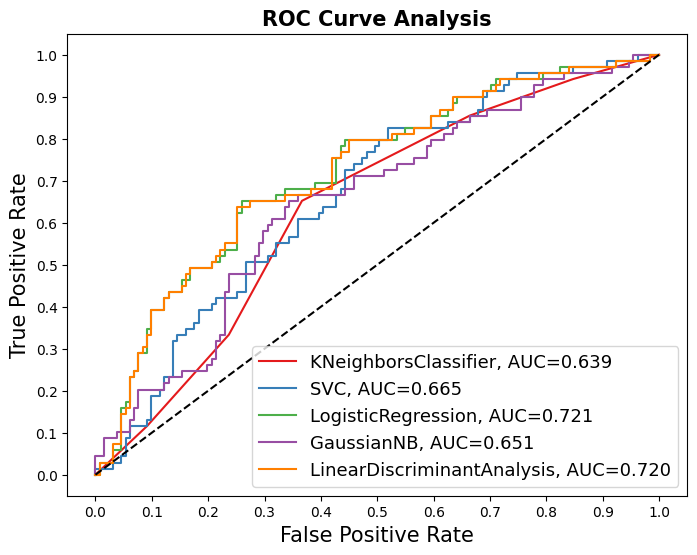

In [62]:
# Fonte: https://www.imranabdullah.com/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot

# Lista dos Modelos
classifiers = [KNeighborsClassifier(), 
               SVC(random_state=18, probability=True), 
               LogisticRegression(random_state=18), 
               GaussianNB(),
               LinearDiscriminantAnalysis()]


# Definir uma tabela de resultados como um DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Treinar os modelos e registrar os resultados
for cls in classifiers:
    clf = Pipeline(steps=[('preprocessor', preprocessor1), ('smote', smt), ('modelos', cls)])
    model = clf.fit(X_train, Y_train)
    Y_proba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(Y_test,  Y_proba)
    auc = roc_auc_score(Y_test, Y_proba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Definir o nome dos classificadores como rótulos de índice
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

for i in result_table.index:
    cores = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#f781bf']
    sns.set_palette(sns.color_palette(cores))
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label='{}, AUC={:.3f}'.format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel('False Positive Rate', fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel('True Positive Rate', fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show();

# 4. Pipeline 2 - Algoritmos Baseados em Árvores (Classes Desbalanceadas)

In [63]:
# Pipeline2

preprocessor2 = ColumnTransformer(
transformers=[
    ('OrdinalEncoder', OrdinalEncoder(), ['sexo', 'habitacao', 'conta_poupanca', 'conta_corrente', 'proposito', 'emprego'])])

**Acurácia - Cross validation**

In [64]:
# Avalição dos Modelos Preditivos

# Definindo os valores para o número de folds 
num_folds = 10
seed = 18

# Lista de modelos
modelos = []
modelos.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state=18)))
modelos.append(('RandomForestClassifier', RandomForestClassifier(random_state = 18)))
modelos.append(('XGBClassifier', XGBClassifier(random_state = 18)))
modelos.append(('LGBMClassifier', ltb.LGBMClassifier(random_state = 1)))
modelos.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = 18)))
modelos.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = 18)))

# Avaliando cada modelo em um loop 
nomes = []
resultados = []
resultados_mean = []
resultados_std = []

for nome, modelo in modelos:
    clf = Pipeline(steps=[('preprocessor', preprocessor2), ('modelos', modelo)])
    kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
    cv_results = cross_val_score(clf, X_train, Y_train, cv = kfold, scoring='accuracy')
    resultados.append(cv_results)
    resultados_mean.append(cv_results.mean()*100)
    resultados_std.append(cv_results.std()*100)
    nomes.append(nome)

# Resultados    
model_result = pd.DataFrame({
'Modelo': nomes,
'Mean': resultados_mean,
'STD': resultados_std})

model_result.sort_values('Mean', ascending=False)

,Modelo,Mean,STD
4,AdaBoostClassifier,70.375,5.334147
5,GradientBoostingClassifier,69.375,6.920305
3,LGBMClassifier,68.500,7.262920
0,DecisionTreeClassifier,66.875,4.584280
2,XGBClassifier,66.750,5.454356
1,RandomForestClassifier,66.625,5.304774


**Confusion Matrix e Classification Report**

In [65]:
# Avalição dos Modelos Preditivos

# Lista de modelos
modelos = [DecisionTreeClassifier(random_state=18),
          RandomForestClassifier(random_state = 18),
          XGBClassifier(random_state = 18),
          ltb.LGBMClassifier(random_state = 18),
          AdaBoostClassifier(random_state = 18),
          GradientBoostingClassifier(random_state = 18)
          ]

# Avaliando cada modelo em um loop
for modelo in modelos:
    clf = Pipeline(steps=[('preprocessor', preprocessor2), ('modelo', modelo)])
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print(modelo)
    print('\n')
    print(confusion_matrix(Y_test, Y_pred))
    print('\n')
    print(classification_report(Y_test, Y_pred))
    print('_____________________________________________________\n')

DecisionTreeClassifier(random_state=18)


[[109  22]
 [ 57  12]]


              precision    recall  f1-score   support

           0       0.66      0.83      0.73       131
           1       0.35      0.17      0.23        69

    accuracy                           0.60       200
   macro avg       0.50      0.50      0.48       200
weighted avg       0.55      0.60      0.56       200

_____________________________________________________

RandomForestClassifier(random_state=18)


[[107  24]
 [ 53  16]]


              precision    recall  f1-score   support

           0       0.67      0.82      0.74       131
           1       0.40      0.23      0.29        69

    accuracy                           0.61       200
   macro avg       0.53      0.52      0.51       200
weighted avg       0.58      0.61      0.58       200

_____________________________________________________

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, col

**OBS:** Para classes desbalanceadas, RandomForestClassifier e LGBMClassifier foram os que apresentaram os melhores resultados, ambos muito parecidos.

# 4.1 -  TENTATIVAS DE TRATAMENTO DO DESBALANCEAMENTO

**Class Weight = 'balanced'**

In [66]:
# Avalição dos Modelos Preditivos

# Lista dos modelos
modelos = [DecisionTreeClassifier(random_state=18, class_weight='balanced'),
          RandomForestClassifier(random_state = 18, class_weight='balanced'),
          XGBClassifier(random_state = 18, scale_pos_weight=2.33), # 700/300 = 2.33
          ltb.LGBMClassifier(random_state = 18, scale_pos_weight=2.33) # 700/300 = 2.33
          ]

# Avaliando cada modelo em um loop
for modelo in modelos:
    clf = Pipeline(steps=[('preprocessor', preprocessor2), ('modelo', modelo)])
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print(modelo)
    print('\n')
    print(confusion_matrix(Y_test, Y_pred))
    print('\n')
    print(classification_report(Y_test, Y_pred))
    print('_____________________________________________________\n')

DecisionTreeClassifier(class_weight='balanced', random_state=18)


[[75 56]
 [35 34]]


              precision    recall  f1-score   support

           0       0.68      0.57      0.62       131
           1       0.38      0.49      0.43        69

    accuracy                           0.55       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.58      0.55      0.56       200

_____________________________________________________

RandomForestClassifier(class_weight='balanced', random_state=18)


[[90 41]
 [40 29]]


              precision    recall  f1-score   support

           0       0.69      0.69      0.69       131
           1       0.41      0.42      0.42        69

    accuracy                           0.59       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.60      0.59      0.60       200

_____________________________________________________

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=No

**OBS:** utilizando Class Weight = 'balance', DecisionTreeClassifier obteve os melhores resultados.

**Class Weight - Diversos Valores**

**DecisionTreeClassifier**

In [67]:
# Encontrar o Melhor Parâmetro de Pesos com GridSearchCV

PLdtc = Pipeline(steps=[('preprocessor', preprocessor2), ('modelo', DecisionTreeClassifier(random_state=18))])

# Definindo os valores para o número de folds 
num_folds = 10
seed = 18
kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)

#GridSearchCV
pesos = np.linspace(1.0, 5.0, num=10)
param_grid = [{'modelo__class_weight':[{0:1,1:p} for p in pesos]}]

grind_dtc = GridSearchCV(PLdtc, param_grid = param_grid, verbose= True, cv = kfold, n_jobs=-1, scoring='recall')
grind_dtc.fit(X_train, Y_train)

print('\n')
print('Melhor Score:', grind_dtc.best_score_)
print('Melhor Parâmetro de Pesos:', grind_dtc.best_params_)
print('\n')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Melhor Score: 0.5910706236936214
Melhor Parâmetro de Pesos: {'modelo__class_weight': {0: 1, 1: 5.0}}




In [68]:
# Encontrar o Melhor Parâmetro de Pesos com GridSearchCV

PLdtc = Pipeline(steps=[('preprocessor', preprocessor2), ('modelo', DecisionTreeClassifier(random_state=18))])

# Definindo os valores para o número de folds 
num_folds = 10
seed = 18
kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)

#GridSearchCV
pesos = np.linspace(1.0, 5.0, num=10)
param_grid = [{'modelo__class_weight':[{0:1,1:p} for p in pesos]}]

grind_dtc = GridSearchCV(PLdtc, param_grid = param_grid, cv = kfold, verbose=True, n_jobs=-1, scoring='f1')
grind_dtc.fit(X_train, Y_train)

print('\n')
print('Melhor Score:', grind_dtc.best_score_)
print('Melhor Parâmetro de Pesos:', grind_dtc.best_params_)
print('\n')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Melhor Score: 0.391506787925344
Melhor Parâmetro de Pesos: {'modelo__class_weight': {0: 1, 1: 5.0}}




In [69]:
# Avaliar diversos valores diferentes de pesos para a classe 1

for p in np.linspace(1.0, 5.0, num=10):
    print('---Peso {} para a classe 1---'.format(p))
    PLdtc = Pipeline(steps=[('preprocessor', preprocessor2), ('modelo', DecisionTreeClassifier(random_state=18, class_weight={0:1,1:p}))])
    PLdtc.fit(X_train, Y_train)
    Y_pred = PLdtc.predict(X_test)
    print('\n')
    print(confusion_matrix(Y_test, Y_pred))
    print('\n')
    print(classification_report(Y_test, Y_pred))

---Peso 1.0 para a classe 1---


[[109  22]
 [ 57  12]]


              precision    recall  f1-score   support

           0       0.66      0.83      0.73       131
           1       0.35      0.17      0.23        69

    accuracy                           0.60       200
   macro avg       0.50      0.50      0.48       200
weighted avg       0.55      0.60      0.56       200

---Peso 1.4444444444444444 para a classe 1---


[[95 36]
 [42 27]]


              precision    recall  f1-score   support

           0       0.69      0.73      0.71       131
           1       0.43      0.39      0.41        69

    accuracy                           0.61       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.60      0.61      0.61       200

---Peso 1.8888888888888888 para a classe 1---


[[89 42]
 [38 31]]


              precision    recall  f1-score   support

           0       0.70      0.68      0.69       131
           1       0.42      0.45      0.

**OBS:** O peso de 4.11 para a classe 1 apresentou o melhor resultado.

**RandomForestClassifier**

In [70]:
# Encontrar o Melhor Parâmetro de Pesos com GridSearchCV

PLrfc = Pipeline(steps=[('preprocessor', preprocessor2), ('modelo', RandomForestClassifier(random_state=18))])

# Definindo os valores para o número de folds 
num_folds = 10
seed = 18
kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)

#GridSearchCV
pesos = np.linspace(1.0, 5.0, num=10)
param_grid = [{'modelo__class_weight':[{0:1,1:p} for p in pesos]}]

grind_rfc = GridSearchCV(PLrfc, param_grid = param_grid, cv = kfold, verbose=True, n_jobs=-1, scoring='recall')
grind_rfc.fit(X_train, Y_train)

print('\n')
print('Melhor Score:', grind_rfc.best_score_)
print('Melhor Parâmetro de Pesos:', grind_rfc.best_params_)
print('\n')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Melhor Score: 0.4946331986091711
Melhor Parâmetro de Pesos: {'modelo__class_weight': {0: 1, 1: 5.0}}




In [71]:
# Encontrar o Melhor Parâmetro de Pesos com GridSearchCV

PLrfc = Pipeline(steps=[('preprocessor', preprocessor2), ('modelo', RandomForestClassifier(random_state=18))])

# Definindo os valores para o número de folds 
num_folds = 10
seed = 18
kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)

#GridSearchCV
pesos = np.linspace(1.0, 5.0, num=10)
param_grid = [{'modelo__class_weight':[{0:1,1:p} for p in pesos]}]

grind_rfc = GridSearchCV(PLrfc, param_grid = param_grid, cv = kfold, verbose=True, n_jobs=-1, scoring='f1')
grind_rfc.fit(X_train, Y_train)

print('\n')
print('Melhor Score:', grind_rfc.best_score_)
print('Melhor Parâmetro de Pesos:', grind_rfc.best_params_)
print('\n')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Melhor Score: 0.36382606271151163
Melhor Parâmetro de Pesos: {'modelo__class_weight': {0: 1, 1: 3.2222222222222223}}




In [72]:
# Avaliar diversos valores diferentes de pesos para a classe 1

for p in np.linspace(1.0, 5.0, num=10):
    print('---Peso {} para a classe 1---'.format(p))
    PLrfc = Pipeline(steps=[('preprocessor', preprocessor2), ('modelo', RandomForestClassifier(random_state=18, class_weight={0:1,1:p}))])
    PLrfc.fit(X_train, Y_train)
    Y_pred = PLrfc.predict(X_test)
    print('\n')
    print(confusion_matrix(Y_test, Y_pred))
    print('\n')
    print(classification_report(Y_test, Y_pred))

---Peso 1.0 para a classe 1---


[[107  24]
 [ 53  16]]


              precision    recall  f1-score   support

           0       0.67      0.82      0.74       131
           1       0.40      0.23      0.29        69

    accuracy                           0.61       200
   macro avg       0.53      0.52      0.51       200
weighted avg       0.58      0.61      0.58       200

---Peso 1.4444444444444444 para a classe 1---


[[102  29]
 [ 50  19]]


              precision    recall  f1-score   support

           0       0.67      0.78      0.72       131
           1       0.40      0.28      0.32        69

    accuracy                           0.60       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.58      0.60      0.58       200

---Peso 1.8888888888888888 para a classe 1---


[[94 37]
 [43 26]]


              precision    recall  f1-score   support

           0       0.69      0.72      0.70       131
           1       0.41      0.38    

**OBS:** O peso de 5.0 para a classe 1 apresentou o melhor resultado.

**4.2.1 - Balanceamento com SMOTE**

**Acurácia - Cross validation**

In [73]:
# Avalição dos Modelos Preditivos

# Definindo os valores para o número de folds 
num_folds = 10
seed = 18

# Lista de modelos
modelos = []
modelos.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state=18)))
modelos.append(('RandomForestClassifier', RandomForestClassifier(random_state = 18)))
modelos.append(('XGBClassifier', XGBClassifier(random_state = 18)))
modelos.append(('LGBMClassifier', ltb.LGBMClassifier(random_state = 18)))
modelos.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = 18)))
modelos.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = 18)))

# Avaliando cada modelo em um loop 
nomes = []
resultados = []
resultados_mean = []
resultados_std = []

for nome, modelo in modelos:
    clf = Pipeline(steps=[('preprocessor', preprocessor2), ('smote', smt), ('modelo', modelo)])
    kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
    cv_results = cross_val_score(clf, X_train, Y_train, cv = kfold, scoring='accuracy')
    resultados.append(cv_results)
    resultados_mean.append(cv_results.mean()*100)
    resultados_std.append(cv_results.std()*100)
    nomes.append(nome)

# Resultados    
model_result = pd.DataFrame({
'Modelo': nomes,
'Mean': resultados_mean,
'STD': resultados_std})

model_result.sort_values('Mean', ascending=False)

,Modelo,Mean,STD
5,GradientBoostingClassifier,63.875,5.490048
0,DecisionTreeClassifier,62.625,5.546677
2,XGBClassifier,61.625,4.678742
1,RandomForestClassifier,61.625,5.001562
4,AdaBoostClassifier,60.875,5.702247
3,LGBMClassifier,59.500,3.840573


**Confusion Matrix e Classification Report**

In [74]:
# Avalição dos Modelos Preditivos

# Lista de modelos
modelos = [DecisionTreeClassifier(random_state=18),
          RandomForestClassifier(random_state = 18),
          XGBClassifier(random_state = 18),
          ltb.LGBMClassifier(random_state = 18),
          AdaBoostClassifier(random_state = 18),
          GradientBoostingClassifier(random_state = 18)
          ]

# Avaliando cada modelo em um loop
for modelo in modelos:
    clf = Pipeline(steps=[('preprocessor', preprocessor2), ('smote', smt), ('modelo', modelo)])
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print(modelo)
    print('\n')
    print(confusion_matrix(Y_test, Y_pred))
    print('\n')
    print(classification_report(Y_test, Y_pred))
    print('_____________________________________________________\n')

DecisionTreeClassifier(random_state=18)


[[95 36]
 [43 26]]


              precision    recall  f1-score   support

           0       0.69      0.73      0.71       131
           1       0.42      0.38      0.40        69

    accuracy                           0.60       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.60      0.60      0.60       200

_____________________________________________________

RandomForestClassifier(random_state=18)


[[91 40]
 [44 25]]


              precision    recall  f1-score   support

           0       0.67      0.69      0.68       131
           1       0.38      0.36      0.37        69

    accuracy                           0.58       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.57      0.58      0.58       200

_____________________________________________________

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_b

**OBS:** Os resultados com valores específicos testados para Class Weight se saíram melhor do que qualquer um dos algoritmos utilizando SMOTE.

**Curva Roc e AUC**

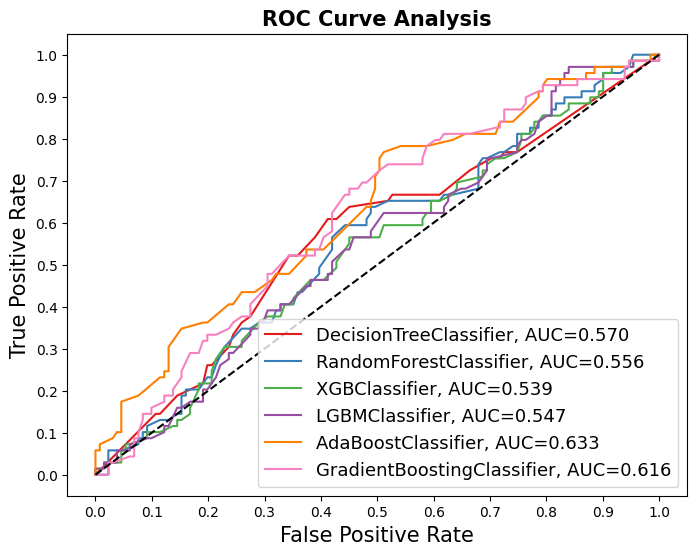

In [75]:
# Fonte: https://www.imranabdullah.com/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot

# Lista dos Modelos
classifiers = [DecisionTreeClassifier(random_state=18), 
               RandomForestClassifier(random_state=18), 
               XGBClassifier(random_state=18), 
               ltb.LGBMClassifier(random_state=18),
               AdaBoostClassifier(random_state=18),
               GradientBoostingClassifier(random_state=18)]


# # Definir uma tabela de resultados como um DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Treinar os modelos e registrar os resultados
for cls in classifiers:
    clf = Pipeline(steps=[('preprocessor', preprocessor2), ('smote', smt), ('modelos', cls)])
    model = clf.fit(X_train, Y_train)
    Y_proba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(Y_test,  Y_proba)
    auc = roc_auc_score(Y_test, Y_proba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Definir o nome dos classificadores como rótulos de índice
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

for i in result_table.index:
    cores = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#f781bf']
    sns.set_palette(sns.color_palette(cores))
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label='{}, AUC={:.3f}'.format(i, result_table.loc[i]['auc']))
  
plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel('False Positive Rate', fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel('True Positive Rate', fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show();

**OBS:** Dos algoritmos utilizando o Pipeline 1, LogisticRegression com peso 3.22 para a classe 1 apresentou o melhor resultado, e dos algoritmos baseados em árvores utilizando o Pipeline 2, DecisionTreeClassifier com peso 4.11 para a classe 1 obteve os melhores resultados, agora vamos fazer a otimização de hiperparâmetros em ambos para ver se conseguimos alguma melhora.

# 5. Otimização de Hiperparâmetros

**LogisticRegression**

**OBS:** scoring='recall'

In [76]:
%%time
PLlr = Pipeline(steps=[('preprocessor', preprocessor1), ('modelo', LogisticRegression(random_state=18, max_iter=5000))])

# Definindo os valores para o número de folds 
num_folds = 10
seed = 18
kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)

#GridSearchCV
pesos = np.linspace(1.0, 5.0, num=10)
param_grid = [{'modelo__penalty' : ['l1', 'l2'],
              'modelo__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
              'modelo__C' : [0.001, 0.009, 0.01, 0.09, 1.0, 1,5 , 10 , 25],
              'modelo__class_weight': [{0:1,1:p} for p in pesos]}]

grind_lr = GridSearchCV(PLlr, param_grid = param_grid, cv = kfold, verbose=True, n_jobs=-1, scoring='recall')
grind_lr.fit(X_train, Y_train)

print('\n')
print('Melhor Score:', grind_lr.best_score_)
print('Melhores parametros:', grind_lr.best_params_)
print('\n')

Fitting 10 folds for each of 900 candidates, totalling 9000 fits


Melhor Score: 1.0
Melhores parametros: {'modelo__C': 0.001, 'modelo__class_weight': {0: 1, 1: 3.2222222222222223}, 'modelo__penalty': 'l1', 'modelo__solver': 'saga'}


CPU times: user 32 s, sys: 278 ms, total: 32.3 s
Wall time: 2min 39s


In [77]:
# Criação do modelo com os melhores parâmetros encontrados

PLlr = Pipeline(steps=[('preprocessor', preprocessor1), ('modelo', LogisticRegression(random_state=18, class_weight={0: 1, 1: 3.22}, C=0.001, penalty='l1', solver='saga'))])
PLlr.fit(X_train, Y_train)
Y_pred = PLlr.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print('\n')
print(classification_report(Y_test, Y_pred))

[[  0 131]
 [  0  69]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.34      1.00      0.51        69

    accuracy                           0.34       200
   macro avg       0.17      0.50      0.26       200
weighted avg       0.12      0.34      0.18       200



**OBS:** scoring='f1'

In [78]:
%%time
PLlr = Pipeline(steps=[('preprocessor', preprocessor1), ('modelo', LogisticRegression(random_state=18, max_iter=5000))])

# Definindo os valores para o número de folds 
num_folds = 10
seed = 18
kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)

#GridSearchCV
pesos = np.linspace(1.0, 5.0, num=10)
param_grid = [{'modelo__penalty' : ['l1', 'l2'],
              'modelo__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
              'modelo__C' : [0.001, 0.009, 0.01, 0.09, 1.0, 1,5 , 10 , 25],
              'modelo__class_weight': [{0:1,1:p} for p in pesos]}]

grind_lr = GridSearchCV(PLlr, param_grid = param_grid, cv = kfold, verbose=True, n_jobs=-1, scoring='f1')
grind_lr.fit(X_train, Y_train)

print('\n')
print('Melhor Score:', grind_lr.best_score_)
print('Melhores parametros:', grind_lr.best_params_)
print('\n')

Fitting 10 folds for each of 900 candidates, totalling 9000 fits


Melhor Score: 0.4718376771054101
Melhores parametros: {'modelo__C': 0.09, 'modelo__class_weight': {0: 1, 1: 4.555555555555555}, 'modelo__penalty': 'l2', 'modelo__solver': 'newton-cg'}


CPU times: user 30.1 s, sys: 299 ms, total: 30.4 s
Wall time: 2min 22s


In [79]:
# Criação do modelo com os melhores parâmetros encontrados

PLlr = Pipeline(steps=[('preprocessor', preprocessor1), ('modelo', LogisticRegression(random_state=18, class_weight={0: 1, 1: 4.55}, C=0.09, penalty='l2', solver='newton-cg'))])
PLlr.fit(X_train, Y_train)
Y_pred = PLlr.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print('\n')
print(classification_report(Y_test, Y_pred))

[[35 96]
 [ 4 65]]


              precision    recall  f1-score   support

           0       0.90      0.27      0.41       131
           1       0.40      0.94      0.57        69

    accuracy                           0.50       200
   macro avg       0.65      0.60      0.49       200
weighted avg       0.73      0.50      0.46       200



**DecisionTreeClassifier**

Vamos utilizar o RandomizedSearchCV, pois com o GridSearchCV iria levar demasiadamente tempo.

**OBS:** scoring='recall'

In [80]:
PLdtc = Pipeline(steps=[('preprocessor', preprocessor2), ('modelo', DecisionTreeClassifier(random_state=18))])

#RandomizedSearchCV
pesos = np.linspace(1.0, 5.0, num=10)
param_grid = {'modelo__max_features': ['auto', 'sqrt', 'log2'],
              'modelo__ccp_alpha': [0.0, 0.1, .01, .001, .0001],
              'modelo__min_samples_split': [1,2,3,4],
              'modelo__min_samples_leaf' :[1,2,3,4],
              'modelo__max_depth' : [9, 10, 13, 15, 20, 25],
              'modelo__criterion' : ['gini', 'entropy'],
              'modelo__class_weight': [{0:1,1:p} for p in pesos]
             }

grind_dtc = RandomizedSearchCV(PLdtc, param_distributions = param_grid, cv = 10, random_state=18, verbose=True, n_jobs=-1, scoring='recall')
grind_dtc.fit(X_train, Y_train)

print('\n')
print('Melhor Score:', grind_dtc.best_score_)
print('Melhores parametros:', grind_dtc.best_params_)
print('\n')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Melhor Score: 1.0
Melhores parametros: {'modelo__min_samples_split': 2, 'modelo__min_samples_leaf': 1, 'modelo__max_features': 'log2', 'modelo__max_depth': 15, 'modelo__criterion': 'gini', 'modelo__class_weight': {0: 1, 1: 4.555555555555555}, 'modelo__ccp_alpha': 0.01}




In [81]:
# Criação do modelo com os melhores parâmetros encontrados

Pldtc = Pipeline(steps=[('preprocessor', preprocessor2), ('modelo', DecisionTreeClassifier(random_state=18, class_weight={0: 1, 1: 4.55}, ccp_alpha=0.01,
                                                                                            criterion='gini', max_depth=15, max_features='log2', min_samples_split=2, min_samples_leaf=1))])
PLdtc.fit(X_train, Y_train)
pred = PLdtc.predict(X_test)
print(confusion_matrix(Y_test, pred))
print('\n')
print(classification_report(Y_test, pred))

[[109  22]
 [ 57  12]]


              precision    recall  f1-score   support

           0       0.66      0.83      0.73       131
           1       0.35      0.17      0.23        69

    accuracy                           0.60       200
   macro avg       0.50      0.50      0.48       200
weighted avg       0.55      0.60      0.56       200



In [82]:
Pldtc = Pipeline(steps=[('preprocessor', preprocessor2), ('modelo', DecisionTreeClassifier(random_state=18))])

#RamdomizedSearchCV
pesos = np.linspace(1.0, 5.0, num=10)
param_grid = {'modelo__max_features': ['auto', 'sqrt', 'log2'],
              'modelo__ccp_alpha': [0.0, 0.1, .01, .001, .0001],
              'modelo__min_samples_split': [1,2,3,4],
              'modelo__min_samples_leaf' :[1,2,3,4],
              'modelo__max_depth' : [9, 10, 13, 15, 20, 25],
              'modelo__criterion' : ['gini', 'entropy'],
              'modelo__class_weight': [{0:1,1:p} for p in pesos]
             }

grind_dtc = RandomizedSearchCV(PLdtc, param_distributions = param_grid, cv = 10, random_state=18, verbose=True, n_jobs=-1, scoring='f1')
grind_dtc.fit(X_train, Y_train)

print('\n')
print('Melhor Score:', grind_dtc.best_score_)
print('Melhores parametros:', grind_dtc.best_params_)
print('\n')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Melhor Score: 0.44809559372666163
Melhores parametros: {'modelo__min_samples_split': 2, 'modelo__min_samples_leaf': 1, 'modelo__max_features': 'log2', 'modelo__max_depth': 15, 'modelo__criterion': 'gini', 'modelo__class_weight': {0: 1, 1: 4.555555555555555}, 'modelo__ccp_alpha': 0.01}




In [83]:
# Criação do modelo com os melhores parâmetros encontrados

PLdtc = Pipeline(steps=[('preprocessor', preprocessor2), ('modelo', DecisionTreeClassifier(random_state=18, class_weight={0: 1, 1: 4.55}, ccp_alpha=0.01,
                                                                                            criterion='gini', max_depth=15, max_features='log2', min_samples_split=2, min_samples_leaf=1))])
PLdtc.fit(X_train, Y_train)
pred = PLdtc.predict(X_test)
print(confusion_matrix(Y_test, pred))
print('\n')
print(classification_report(Y_test, pred))

[[  0 131]
 [  0  69]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.34      1.00      0.51        69

    accuracy                           0.34       200
   macro avg       0.17      0.50      0.26       200
weighted avg       0.12      0.34      0.18       200



**OBS1:** Ao tentar fazer a otimização de hiperparâmetros tivemos que definir uma única métrica previamente. Assim, o GrindSearchCV e RandomizedSearchCV buscam os melhores hiperparâmetros considerando somente essa métrica, o que não leva aos melhores resultados segundo os critérios definidos neste projeto.

**OBS2:** Portanto, conforme os critérios que definimos, o modelo baseline LogisticRegression com peso 3.22 para a classe 1, apresentou o melhor resultado, com recall 0.80, f1-score 0.59, diferença entre falsos positivos e falsos negativos, igual a 50 e uma acurácia de 0.61. Ou seja, de todos os empréstimos presentes na amostra que realmente foram ruins (Falsos Negativos) nosso modelo conseguiu acertar 80%, mas também manteve um número razoável de empréstimos bons classificados erroneamente como ruins (Falsos Positivos).

**OBS3:** A escolha do modelo ideal deve ser feita conforme as métricas de negócio estabelecidas. Se o custo de perder um empréstimo ruim supera em muito o custo de cancelar vários empréstimos legítimos, ou seja, falsos positivos, talvez possamos escolher um peso que nos dê uma taxa de recall mais alta. Isso ocorre porque aumentamos nossa pontuação de recall de maus empréstimos à custa de mais casos legítimos mal classificados.